In [1]:
import numpy as np
import matplotlib.pyplot as plt

from csv import reader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#TREINO

Iniciamos carregando o dataset de treino e dropando os atributos desnecessários.

In [2]:
df = pd.read_csv('CAL-VAL_INMET(RN)_2022.csv', sep=',')
df.drop(['Lançamento', 'forecast_hour'], axis=1, inplace=True)
df.head()

Horizonte  u(1)1000  v(1)1000  u(2)1000  v(2)1000  u(3)1000  v(3)1000  \
0          3 -3.160442  2.502424 -6.530442  4.262424 -5.400442  3.922424   
1         15 -5.173811  2.404311 -6.043811  4.204311 -5.443811  3.774312   
2         21 -3.619492  2.516850 -6.499492  4.396851 -5.839492  3.636851   
3         12 -4.941391  2.550539 -6.831392  3.890540 -6.121392  3.670540   
4          9 -3.779302  2.153100 -7.119302  3.803101 -5.909302  3.533101   

   u(4)1000  v(4)1000  Observação (m/s)  
0 -2.170442  1.782424               4.1  
1 -5.163811  2.294312               5.2  
2 -2.879492  1.976851               5.5  
3 -4.921391  2.280540               4.2  
4 -2.429302  1.723101               4.5

In [3]:
df.isna().sum() #verificando se haviam dados nulos

Horizonte           0
u(1)1000            0
v(1)1000            0
u(2)1000            0
v(2)1000            0
u(3)1000            0
v(3)1000            0
u(4)1000            0
v(4)1000            0
Observação (m/s)    0
dtype: int64

In [4]:
#colocando os valores referentes a cada horizonte em uma lista
H = df['Horizonte'].unique()
H.sort()
H

array([ 3,  6,  9, 12, 15, 18, 21, 24])

In [5]:
# Cria datasets para cada valor do horizonte e prepara os dados
h_data = []
for h in H:
    h = df[df.Horizonte == h].copy()
    h.drop(['Horizonte'], axis=1, inplace=True)
    h.reset_index(drop=True, inplace=True)
    h_data.append(h)

##Treinando com Modelos de Regressão

Aqui eu defini funções para plotar os resultados das previsões vs o real para cada modelo implementado.
Busquei me manter em modelos de regressão com os quais tinha mais familiaridade, mas me desafiei um pouco e implementei um modelo utilizado para previsão de séries temporais, o LSTM (Long Short-Term Memory).

In [6]:
def plot_lstm(predictions, y_test):
  plt.figure(figsize=(10,6))
  plt.plot(y_test, color='g', label='Real')
  plt.plot(predictions, color='orange', label='Previsão')
  plt.title('Comparação entre dados reais e a previsão do modelo')
  plt.legend()
  plt.show()
  pass

def plot_svr(previsoes_svr, y_test):
  plt.figure(figsize=(10,6))
  plt.plot(y_test, color='g', label='Real')
  plt.plot(previsoes_svr, color='red', label='Previsão')
  plt.title('Comparação entre dados reais e a previsão do modelo')
  plt.legend()
  plt.show()
  pass

def plot_rl(previsoes_linear, y_test):
  plt.figure(figsize=(10,6))
  plt.plot(y_test, color='g', label='Real')
  plt.plot(previsoes_linear, color='b', label='Previsão')
  plt.title('Comparação entre dados reais e a previsão do modelo')
  plt.legend()
  plt.show()
  pass

def plot_arvore(previsoes_arvore, y_test):
  plt.figure(figsize=(10,6))
  plt.plot(y_test, color='g', label='Real')
  plt.plot(previsoes_arvore, color='purple', label='Previsão')
  plt.title('Comparação entre dados reais e a previsão do modelo')
  plt.legend()
  plt.show()
  pass


Criei um laço para executar os modelos de aprendizagem para cada dataset que, por sua vez, foram definidos com base em cada horizonte (como visto anteriormente), de forma a evitar a repetição desnecessária de código e economizar tempo. Além disso, chamei as funções de plotagem das comparações das predições de cada método respectivo. Assim, a cada iteração do laço, o código irá executar o modelo de ML e plotar os resultados, para cada dataset.

Horizonte  3
Epoch 1/10
21/21 [==============================] - 9s 11ms/step - loss: 11.8252
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 3.4631
Epoch 3/10
21/21 [==============================] - 0s 21ms/step - loss: 1.5632
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 1.3790
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 1.3577
Epoch 6/10
21/21 [==============================] - 0s 10ms/step - loss: 1.3123
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 1.2638
Epoch 8/10
21/21 [==============================] - 0s 14ms/step - loss: 1.1966
Epoch 9/10
21/21 [==============================] - 0s 16ms/step - loss: 1.1905
Epoch 10/10
5/5 [==============================] - 2s 6ms/step
LSTM
MSE: 1.2670246508612786
MAE: 0.944467306799359
R2: 0.13643956379736588 



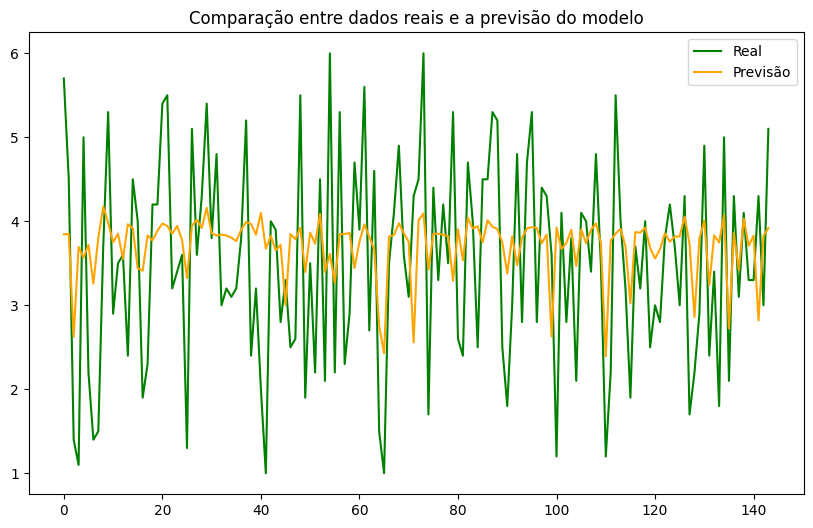

SVR
MSE: 0.6034596606951863
MAE: 0.6058752069416338
R2: 0.5887026448408978 



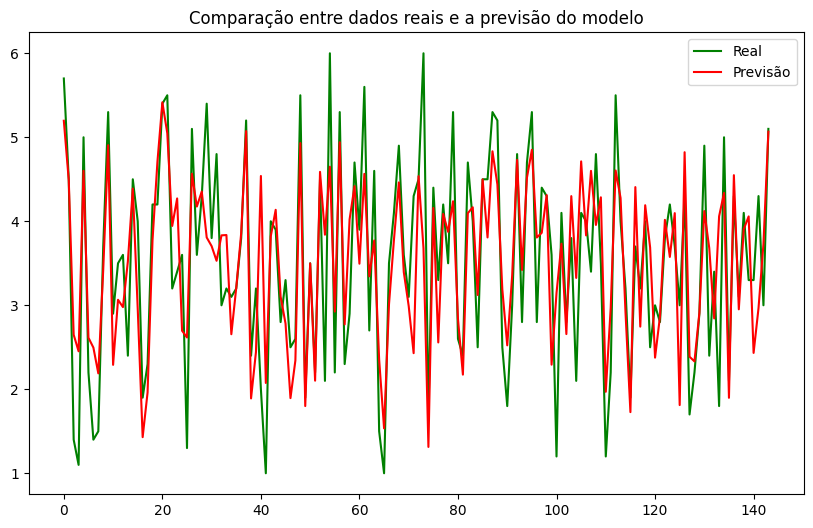

Regressão Linear
MSE: 0.6602332728390904
MAE: 0.6569031545558139
R2: 0.5500077029276037 



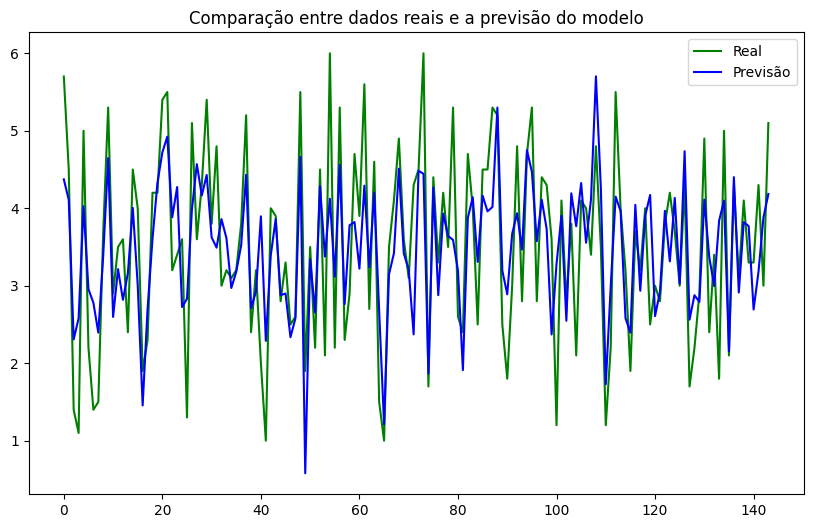

Árvore de Decisão
MSE: 0.9204861111111112
MAE: 0.7701388888888889
R2: 0.3726283169871749 



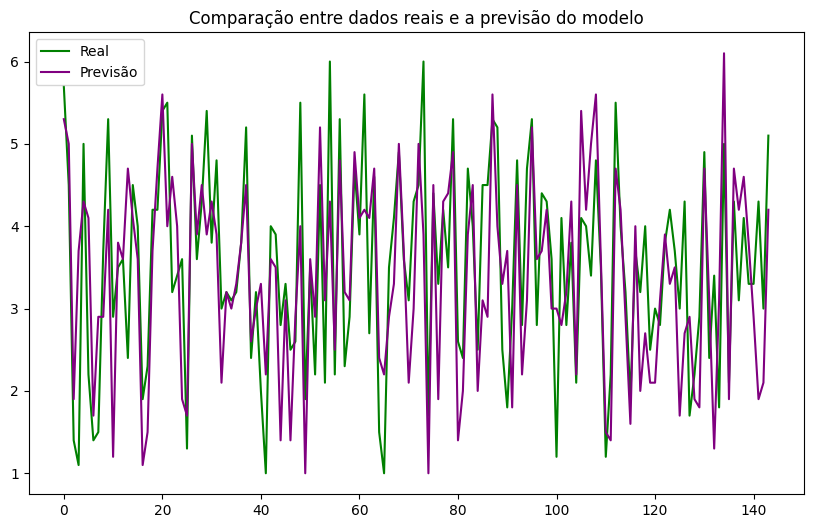

Horizonte  6
Epoch 1/10
21/21 [==============================] - 6s 19ms/step - loss: 11.0941
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 3.5403
Epoch 3/10
21/21 [==============================] - 0s 18ms/step - loss: 1.5902
Epoch 4/10
21/21 [==============================] - 0s 21ms/step - loss: 1.4192
Epoch 5/10
21/21 [==============================] - 1s 25ms/step - loss: 1.3604
Epoch 6/10
21/21 [==============================] - 0s 15ms/step - loss: 1.3401
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 1.3198
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 1.3122
Epoch 9/10
21/21 [==============================] - 0s 14ms/step - loss: 1.2801
Epoch 10/10
5/5 [==============================] - 1s 6ms/step
LSTM
MSE: 1.372151701312261
MAE: 0.9820439719491534
R2: 0.14268400249572077 



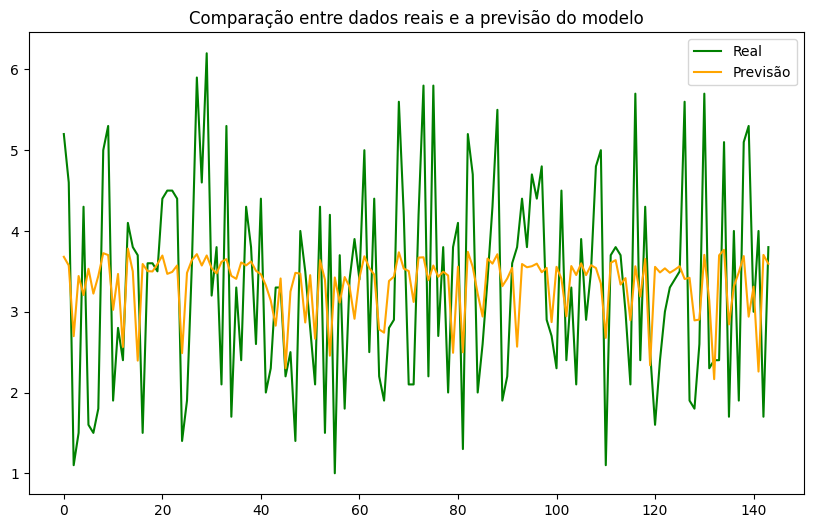

SVR
MSE: 0.7038060681087149
MAE: 0.641061248558358
R2: 0.5602642180502786 



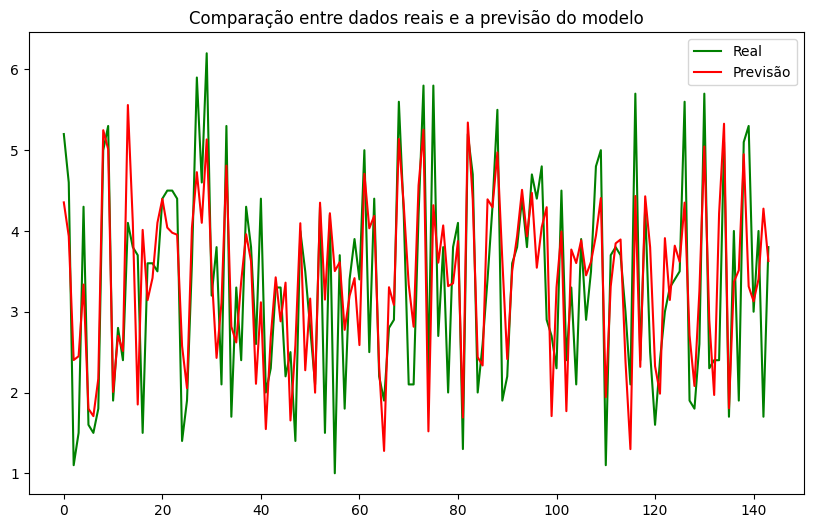

Regressão Linear
MSE: 0.9583538077767406
MAE: 0.7573329384475311
R2: 0.4012236038548874 



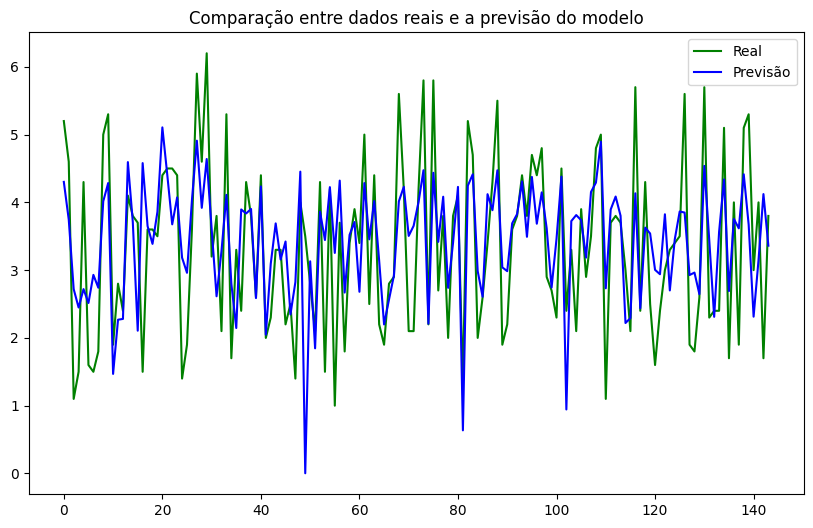

Árvore de Decisão
MSE: 1.1152083333333331
MAE: 0.7965277777777777
R2: 0.3032213976031981 



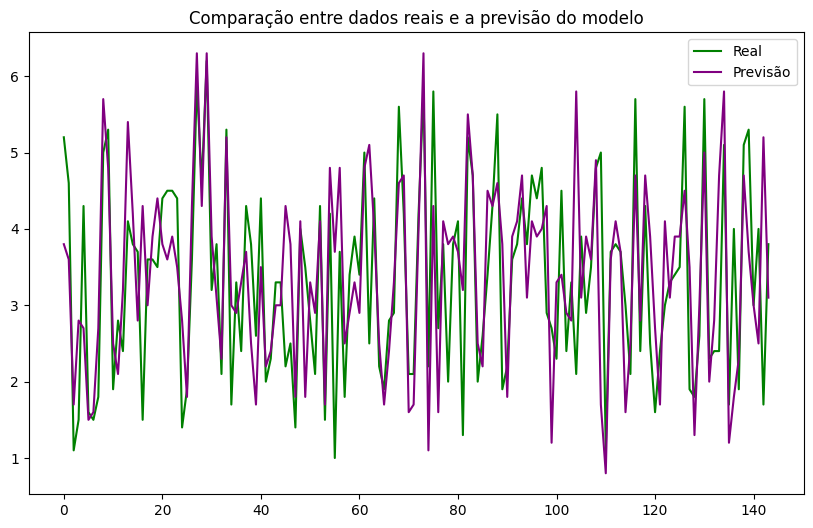

Horizonte  9
Epoch 1/10
21/21 [==============================] - 5s 12ms/step - loss: 11.8308
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 3.7249
Epoch 3/10
21/21 [==============================] - 0s 15ms/step - loss: 1.4486
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 1.2592
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 1.2286
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 1.2026
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 1.1766
Epoch 8/10
21/21 [==============================] - 0s 24ms/step - loss: 1.1429
Epoch 9/10
21/21 [==============================] - 1s 24ms/step - loss: 1.1409
Epoch 10/10
5/5 [==============================] - 1s 8ms/step
LSTM
MSE: 1.282524624949747
MAE: 0.9330728080537585
R2: 0.20167890796348098 



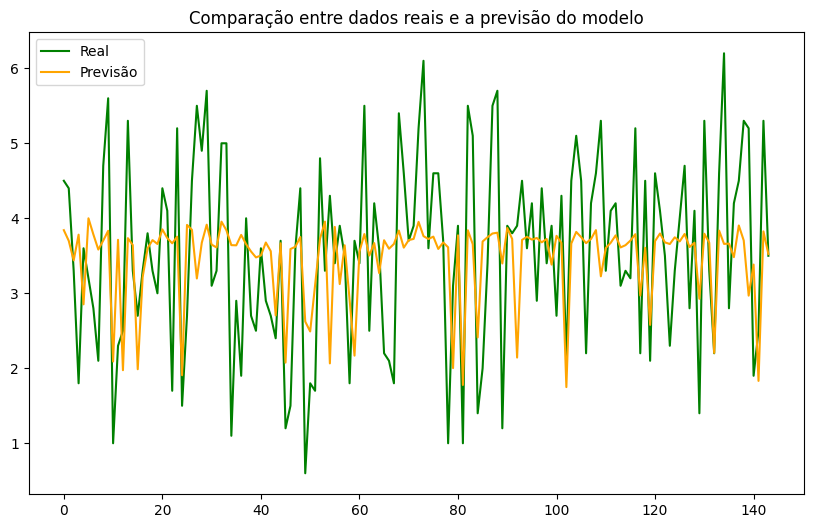

SVR
MSE: 0.5932259924457737
MAE: 0.6157699226924591
R2: 0.6307401722346546 



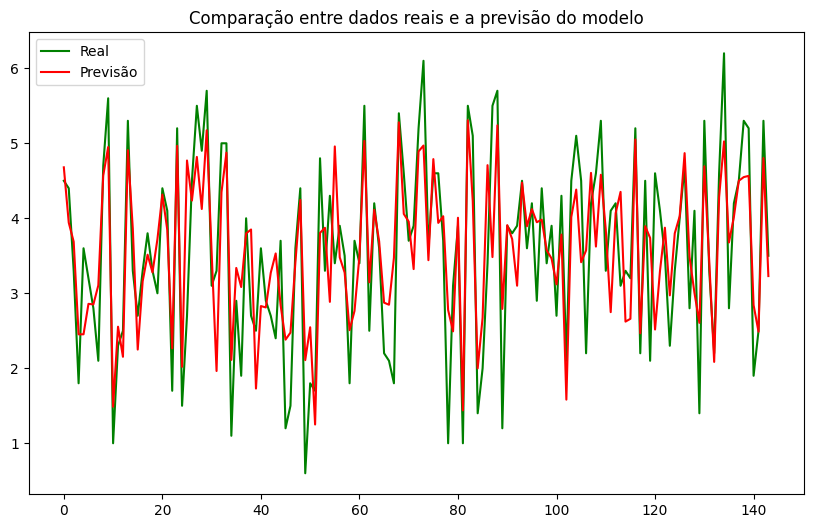

Regressão Linear
MSE: 0.6037198539298816
MAE: 0.6355831834382352
R2: 0.6242081565550327 



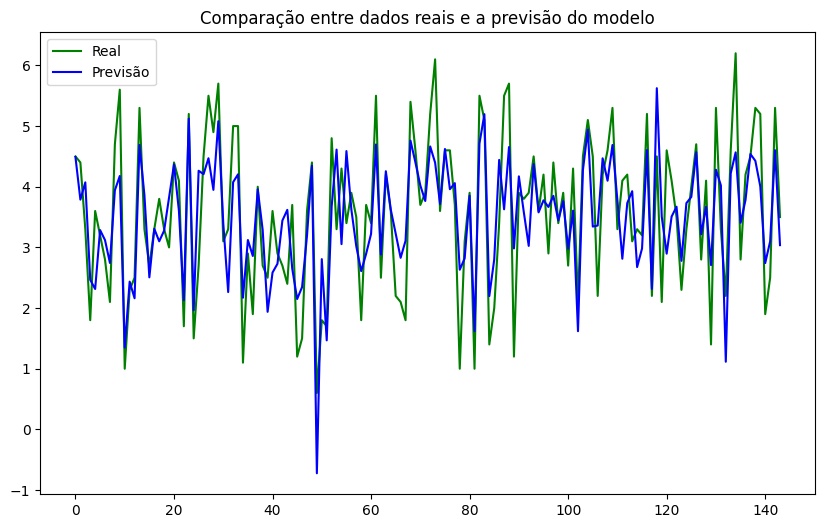

Árvore de Decisão
MSE: 1.0434027777777777
MAE: 0.8048611111111111
R2: 0.350522844719546 



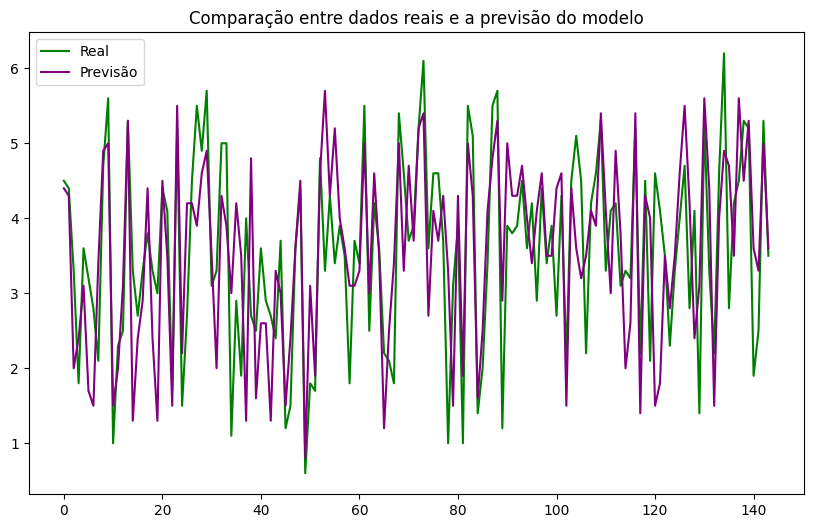

Horizonte  12
Epoch 1/10
21/21 [==============================] - 6s 14ms/step - loss: 10.6971
Epoch 2/10
21/21 [==============================] - 0s 20ms/step - loss: 3.2076
Epoch 3/10
21/21 [==============================] - 0s 16ms/step - loss: 1.5516
Epoch 4/10
21/21 [==============================] - 0s 16ms/step - loss: 1.3445
Epoch 5/10
21/21 [==============================] - 0s 16ms/step - loss: 1.3047
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 1.2815
Epoch 7/10
21/21 [==============================] - 0s 16ms/step - loss: 1.2555
Epoch 8/10
21/21 [==============================] - 0s 20ms/step - loss: 1.2246
Epoch 9/10
21/21 [==============================] - 1s 27ms/step - loss: 1.2065
Epoch 10/10
5/5 [==============================] - 3s 8ms/step
LSTM
MSE: 1.508888867230103
MAE: 1.0387880626651977
R2: 0.1542234453828929 



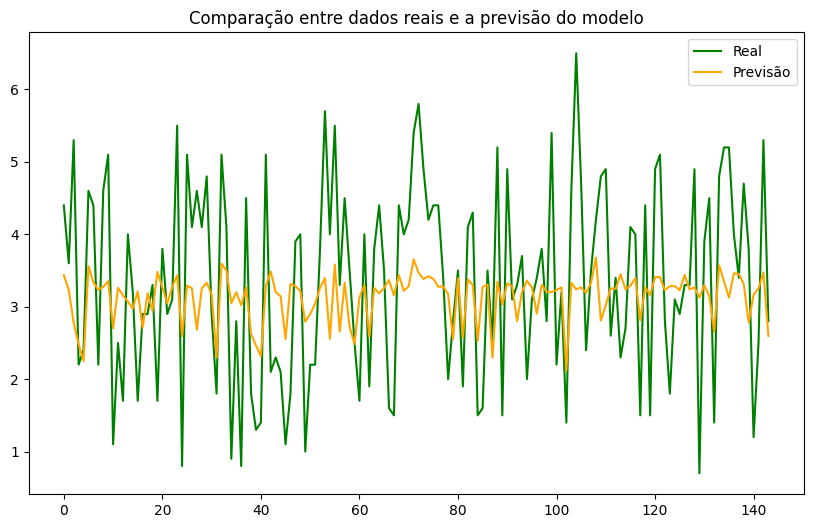

SVR
MSE: 0.7852161084988588
MAE: 0.6905289909921067
R2: 0.5598632945744038 



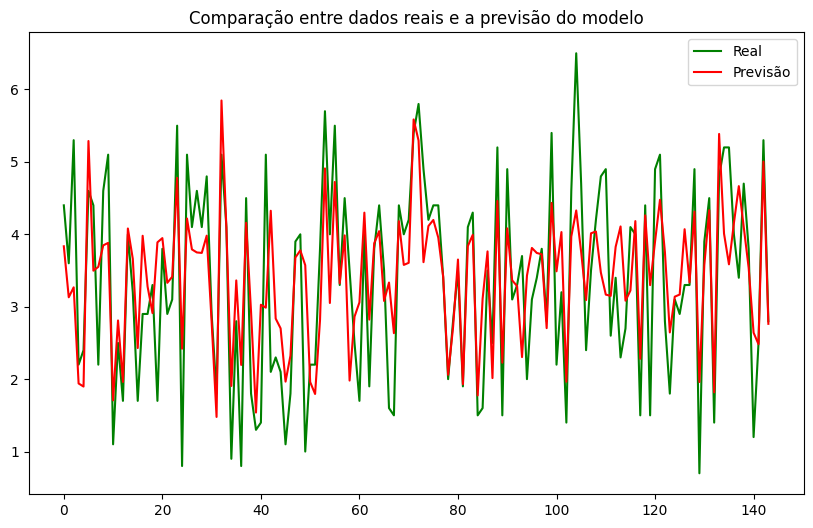

Regressão Linear
MSE: 0.9708678407811379
MAE: 0.8003484844288553
R2: 0.4558000425360691 



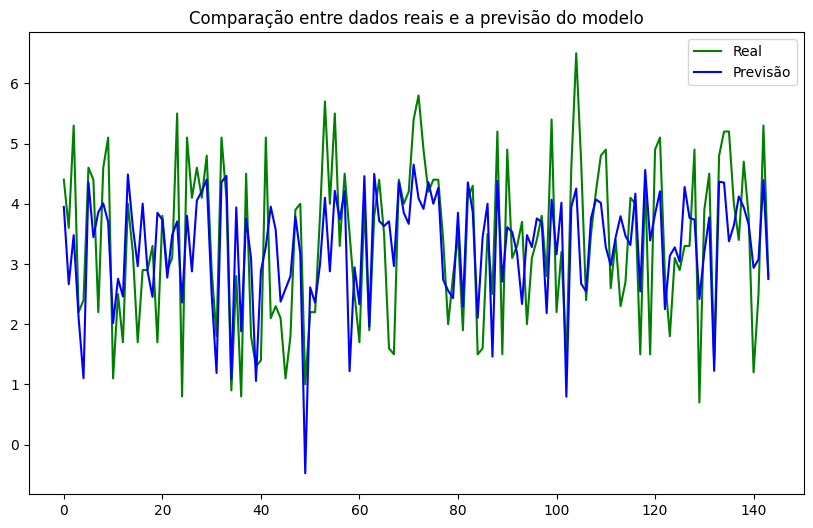

Árvore de Decisão
MSE: 1.3152083333333335
MAE: 0.8673611111111111
R2: 0.2627870766835345 



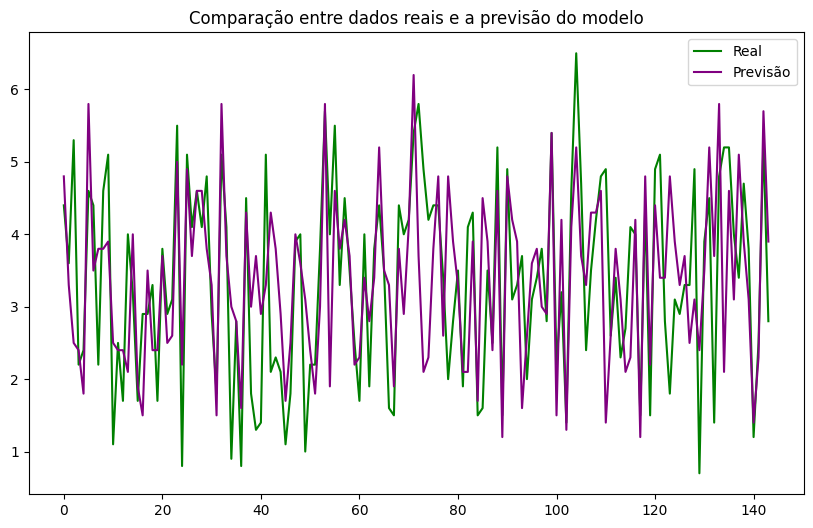

Horizonte  15
Epoch 1/10
21/21 [==============================] - 6s 15ms/step - loss: 11.8166
Epoch 2/10
21/21 [==============================] - 0s 17ms/step - loss: 3.5974
Epoch 3/10
21/21 [==============================] - 0s 21ms/step - loss: 1.4247
Epoch 4/10
21/21 [==============================] - 0s 19ms/step - loss: 1.2685
Epoch 5/10
21/21 [==============================] - 0s 21ms/step - loss: 1.2129
Epoch 6/10
21/21 [==============================] - 0s 16ms/step - loss: 1.1958
Epoch 7/10
21/21 [==============================] - 0s 17ms/step - loss: 1.1735
Epoch 8/10
21/21 [==============================] - 0s 16ms/step - loss: 1.1333
Epoch 9/10
21/21 [==============================] - 0s 15ms/step - loss: 1.1308
Epoch 10/10
5/5 [==============================] - 1s 7ms/step
LSTM
MSE: 1.4090838286702398
MAE: 0.9521913665864202
R2: 0.051545822752110726 



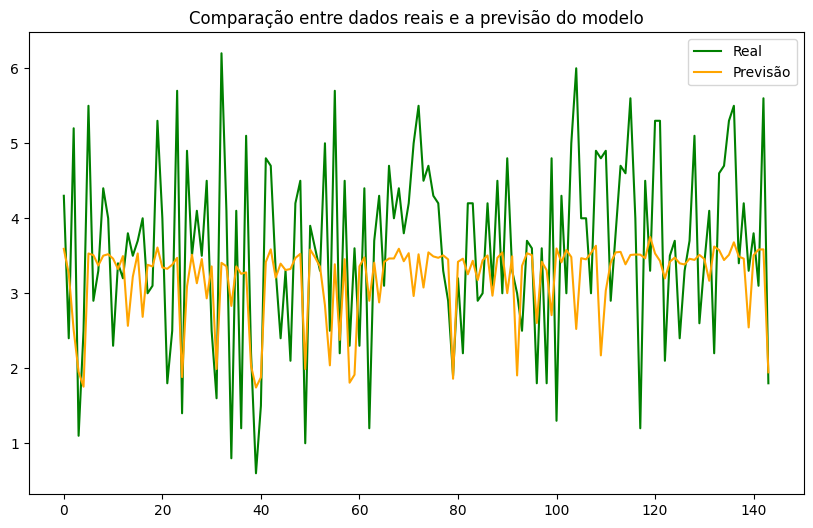

SVR
MSE: 0.5436798811864237
MAE: 0.5795611962175966
R2: 0.634049129012057 



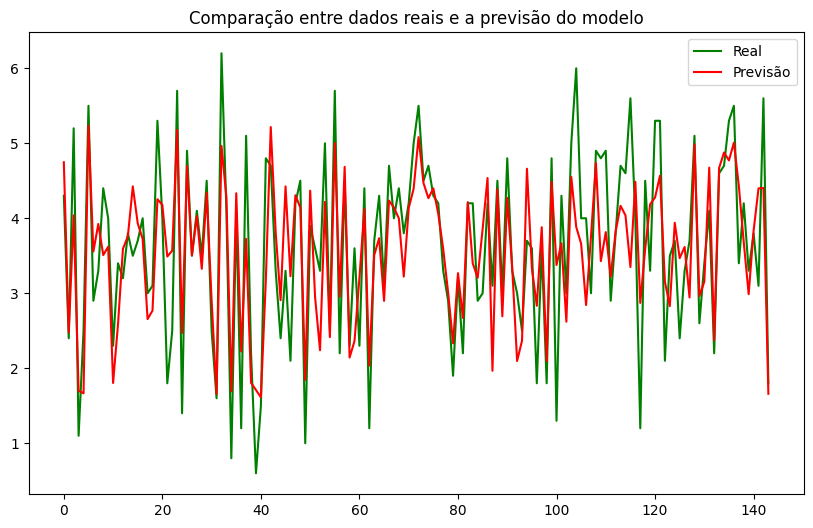

Regressão Linear
MSE: 0.6700462085782974
MAE: 0.649801371033733
R2: 0.5489919673019531 



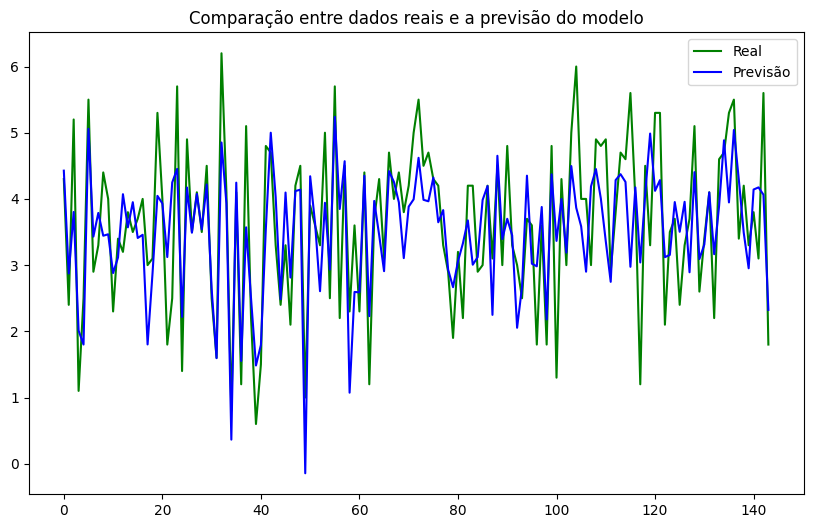

Árvore de Decisão
MSE: 0.9627083333333333
MAE: 0.7618055555555555
R2: 0.35200112183315846 



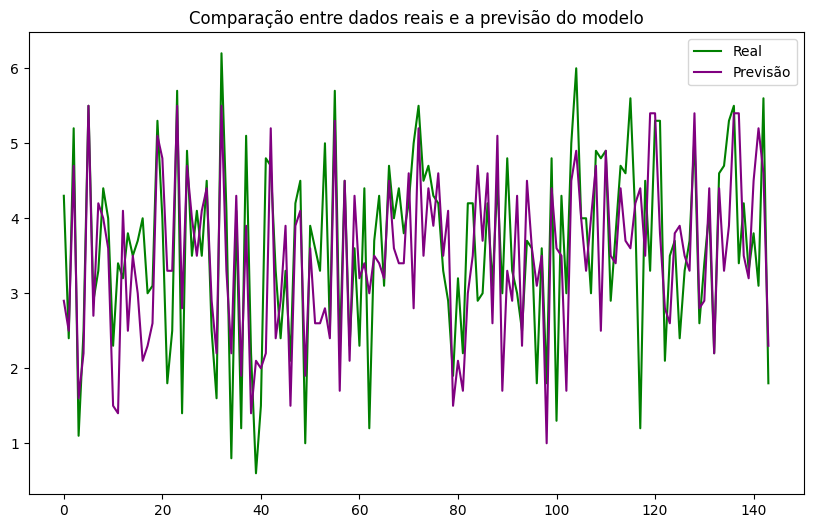

Horizonte  18
Epoch 1/10
21/21 [==============================] - 5s 16ms/step - loss: 10.8271
Epoch 2/10
21/21 [==============================] - 0s 19ms/step - loss: 3.2448
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 1.5090
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.3386
Epoch 5/10
21/21 [==============================] - 0s 23ms/step - loss: 1.3249
Epoch 6/10
21/21 [==============================] - 1s 27ms/step - loss: 1.2504
Epoch 7/10
21/21 [==============================] - 1s 28ms/step - loss: 1.2128
Epoch 8/10
21/21 [==============================] - 0s 24ms/step - loss: 1.1754
Epoch 9/10
21/21 [==============================] - 1s 24ms/step - loss: 1.1869
Epoch 10/10
5/5 [==============================] - 1s 7ms/step
LSTM
MSE: 1.221322340462717
MAE: 0.9085178843802877
R2: 0.20805152796830817 



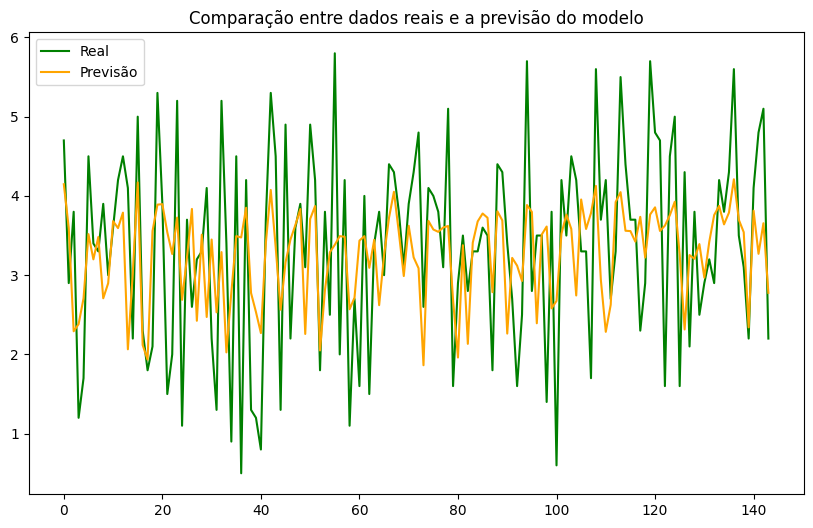

SVR
MSE: 0.7224539403399994
MAE: 0.6614852216176466
R2: 0.531535389790077 



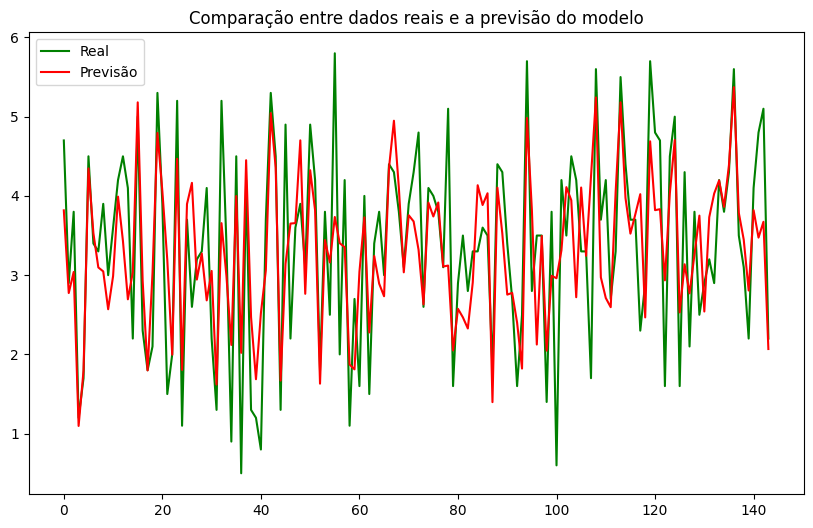

Regressão Linear
MSE: 0.9065288591649462
MAE: 0.7582969038356904
R2: 0.41217472154295054 



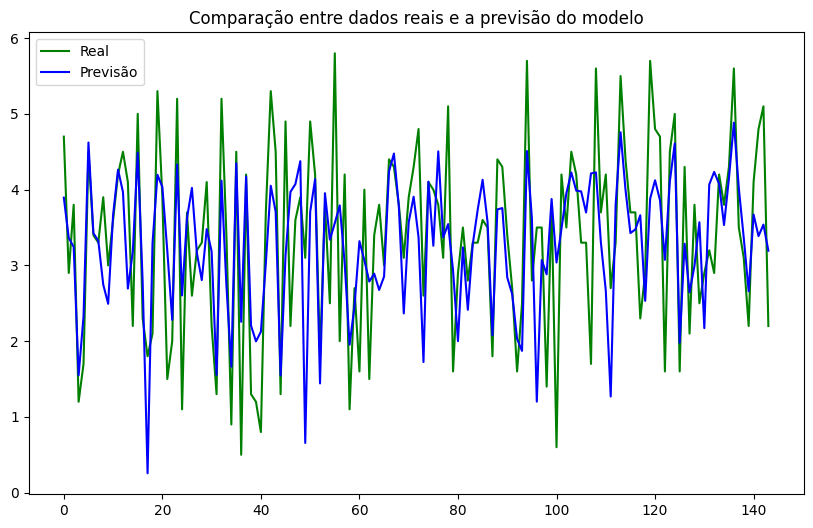

Árvore de Decisão
MSE: 1.2977777777777777
MAE: 0.8694444444444444
R2: 0.15847512642861528 



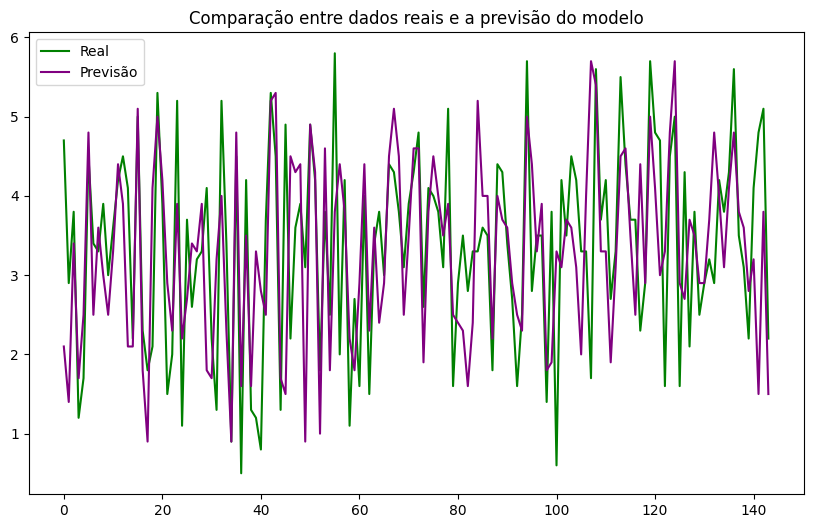

Horizonte  21
Epoch 1/10
21/21 [==============================] - 7s 13ms/step - loss: 12.4602
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 4.1344
Epoch 3/10
21/21 [==============================] - 0s 20ms/step - loss: 1.5050
Epoch 4/10
21/21 [==============================] - 0s 16ms/step - loss: 1.2803
Epoch 5/10
21/21 [==============================] - 0s 15ms/step - loss: 1.2071
Epoch 6/10
21/21 [==============================] - 0s 15ms/step - loss: 1.1691
Epoch 7/10
21/21 [==============================] - 0s 20ms/step - loss: 1.1877
Epoch 8/10
21/21 [==============================] - 0s 16ms/step - loss: 1.1499
Epoch 9/10
21/21 [==============================] - 0s 17ms/step - loss: 1.1294
Epoch 10/10
5/5 [==============================] - 2s 6ms/step
LSTM
MSE: 1.227461460626772
MAE: 0.9019854194588129
R2: 0.15246911086895554 



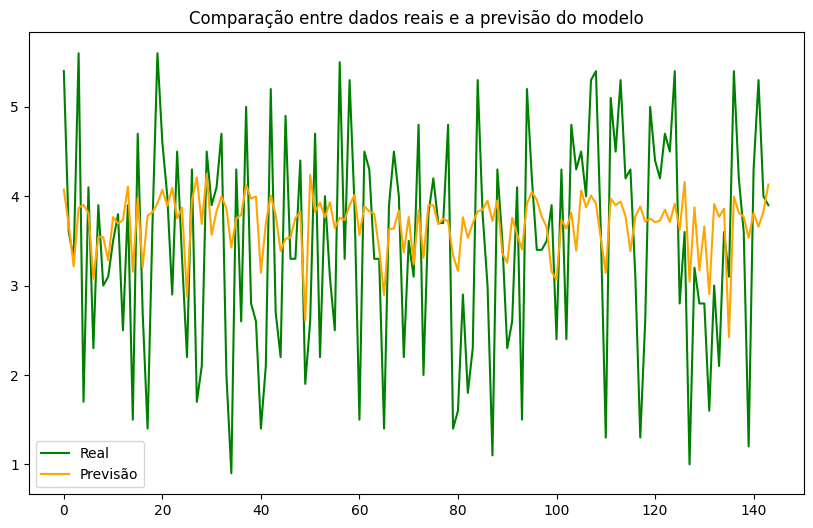

SVR
MSE: 0.6419204695681466
MAE: 0.608037085649288
R2: 0.5567702581499341 



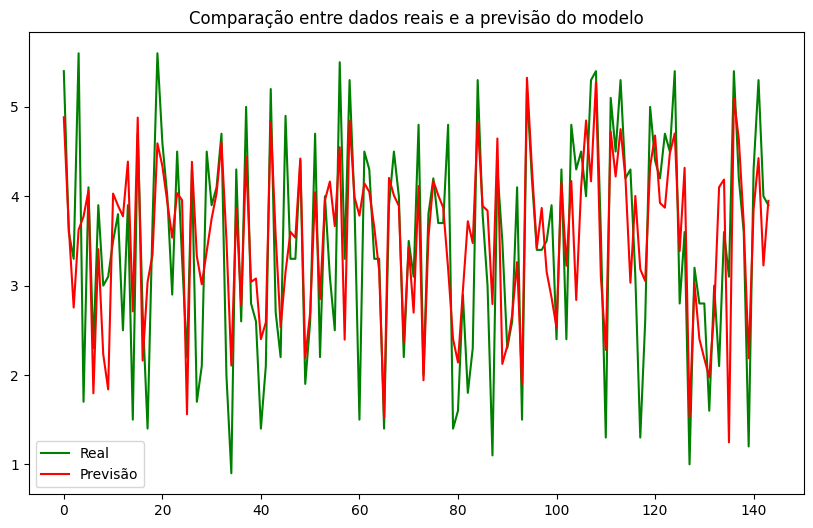

Regressão Linear
MSE: 0.8448569836455808
MAE: 0.7354275098594434
R2: 0.416647761655928 



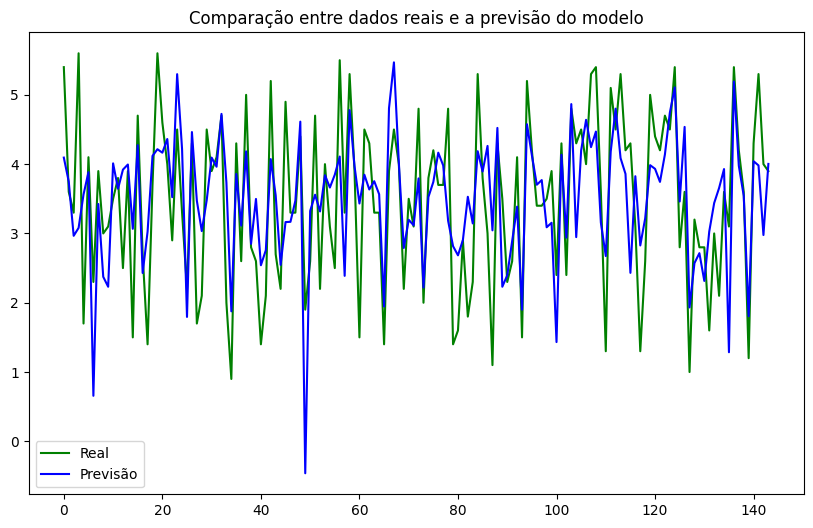

Árvore de Decisão
MSE: 1.2268055555555555
MAE: 0.873611111111111
R2: 0.15292199662221562 



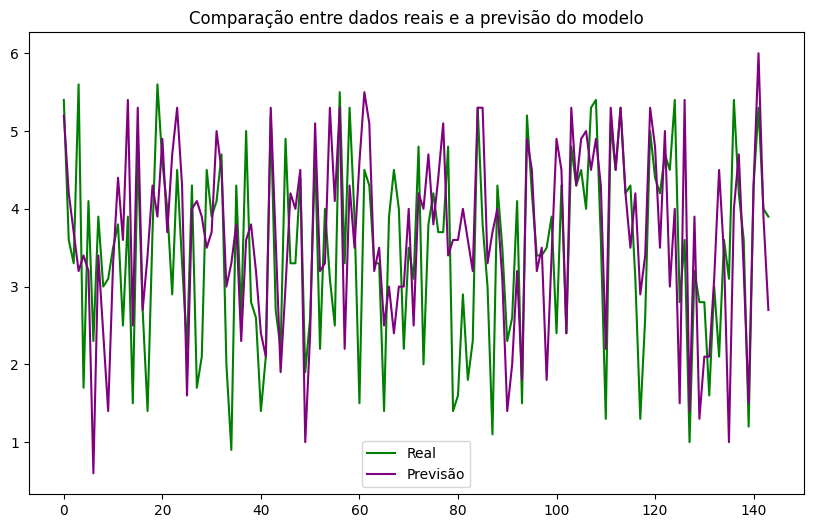

Horizonte  24
Epoch 1/10
21/21 [==============================] - 5s 18ms/step - loss: 11.0269
Epoch 2/10
21/21 [==============================] - 0s 20ms/step - loss: 3.6175
Epoch 3/10
21/21 [==============================] - 0s 18ms/step - loss: 1.6196
Epoch 4/10
21/21 [==============================] - 0s 19ms/step - loss: 1.5254
Epoch 5/10
21/21 [==============================] - 0s 19ms/step - loss: 1.4718
Epoch 6/10
21/21 [==============================] - 0s 18ms/step - loss: 1.4069
Epoch 7/10
21/21 [==============================] - 0s 15ms/step - loss: 1.3871
Epoch 8/10
21/21 [==============================] - 0s 14ms/step - loss: 1.3566
Epoch 9/10
21/21 [==============================] - 0s 21ms/step - loss: 1.3506
Epoch 10/10
5/5 [==============================] - 2s 7ms/step
LSTM
MSE: 1.388526553621582
MAE: 0.9780757807195187
R2: 0.03123674993709391 



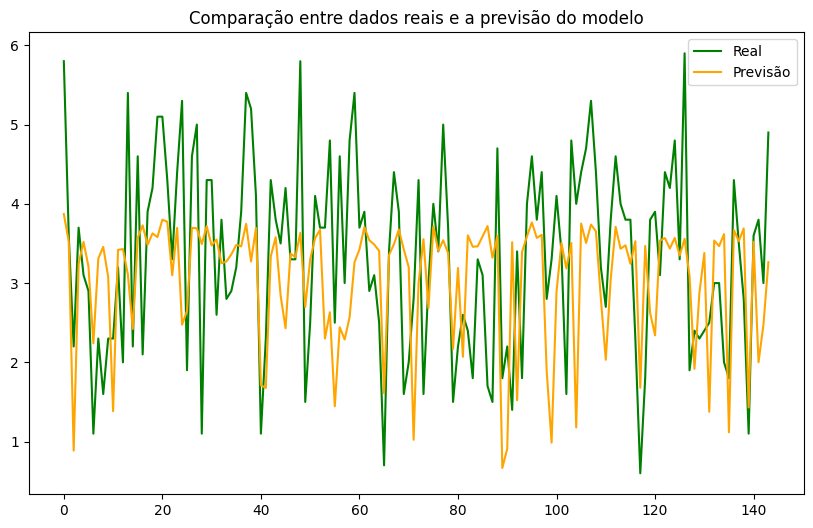

SVR
MSE: 0.7652365513236279
MAE: 0.6753166235956604
R2: 0.4661009207251757 



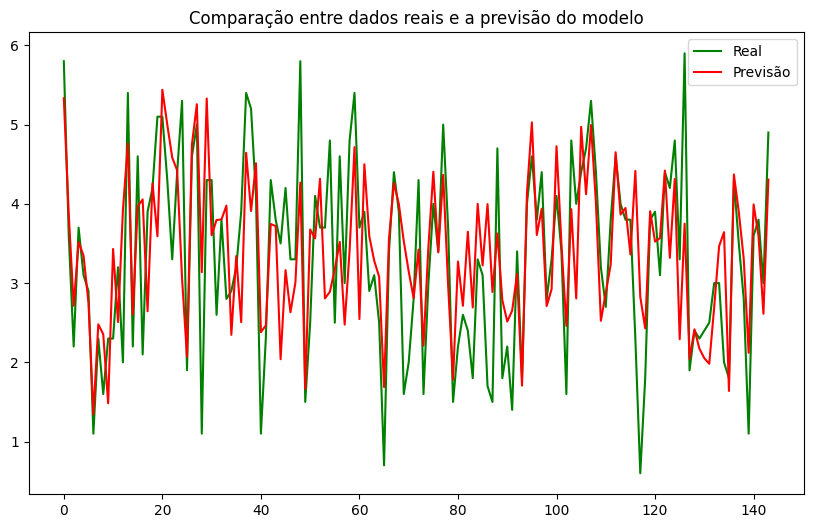

Regressão Linear
MSE: 0.8152534042808794
MAE: 0.703363372603607
R2: 0.4312045848197473 



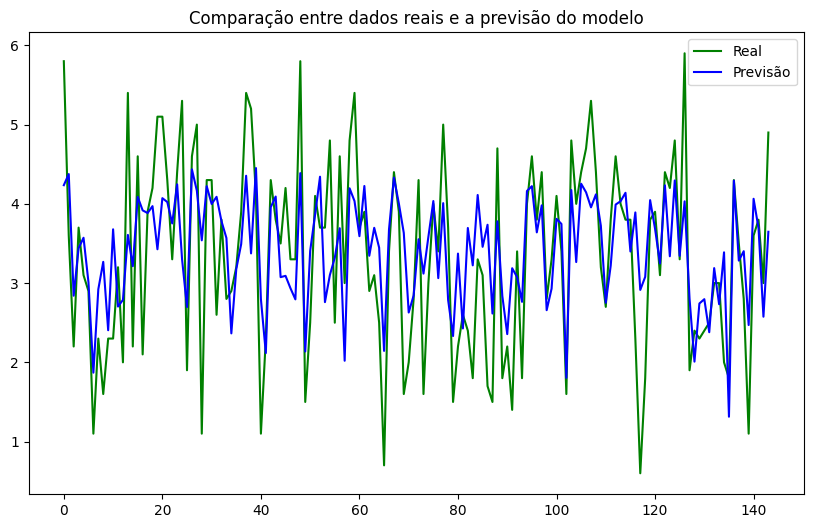

Árvore de Decisão
MSE: 1.4734027777777778
MAE: 0.9090277777777777
R2: -0.027980674859114263 



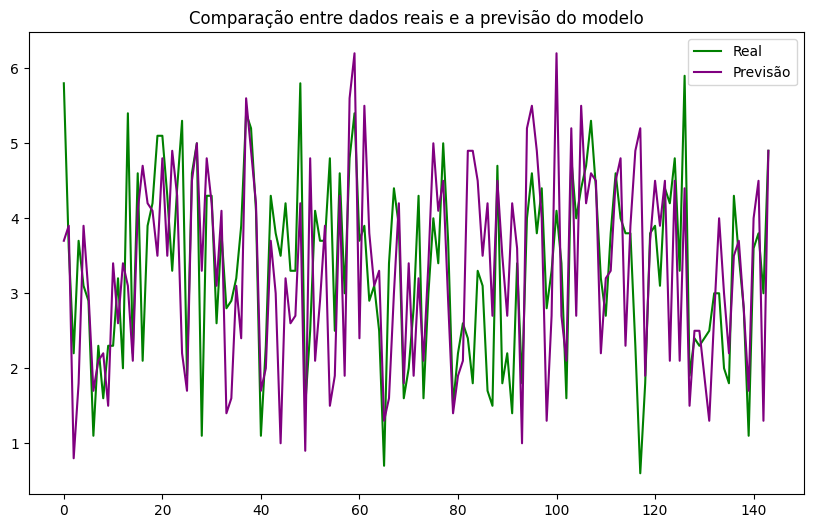

In [7]:
# Treinamento
i=0
for dados in h_data:

  i=i+3
  print("Horizonte ", i)

  #divisao de dados atributos e classe
  X = dados.values[:, 0:-1] #caracteristicas
  Y = dados.values[:, -1] #classe

  #usando o metodo para criar os conjuntos de treinamento, validacao e teste
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)

  #normalização
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  # aplicacao dos modelos
#***************LSTM***************
  # Create the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
  model.add(LSTM(50))
  model.add(Dense(1))

  # Compile the model
  model.compile(loss='mean_squared_error', optimizer='adam')

  # Train the model
  model.fit(X_train_scaled, y_train, epochs=10, batch_size=16)

  # Make predictions
  predictions = model.predict(X_test_scaled)

  # Avaliação do modelo
  mse_lstm = mean_squared_error(y_test, predictions)
  mae_lstm = mean_absolute_error(y_test, predictions)
  r2_lstm = r2_score(y_test, predictions)

  print("LSTM")
  print("MSE:", mse_lstm)
  print("MAE:", mae_lstm)
  print("R2:", r2_lstm,"\n")
  plot_lstm(predictions, y_test)


#*******Support Vector Regression (SVR)*******
  param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

  # Criação do modelo SVR
  modelo_svr = SVR(kernel='rbf', C=1, epsilon=0.01)

  # Treinamento do modelo com os dados
  modelo_svr.fit(X_train_scaled, y_train)

  # Previsões do modelo
  previsoes_svr = modelo_svr.predict(X_test_scaled)

  # Avaliação do modelo
  mse_svr = mean_squared_error(y_test, previsoes_svr)
  mae_svr = mean_absolute_error(y_test, previsoes_svr)
  r2_svr = r2_score(y_test, previsoes_svr)

  print("SVR")
  print("MSE:", mse_svr)
  print("MAE:", mae_svr)
  print("R2:", r2_svr, "\n")
  plot_svr(previsoes_svr, y_test)


#**********Regressão Linear**********
  # Criação do modelo de regressão linear
  modelo_linear = LinearRegression()

  # Treinamento do modelo com os dados
  modelo_linear.fit(X_train_scaled, y_train)

  # Previsões do modelo
  previsoes_linear = modelo_linear.predict(X_test_scaled)

  # Avaliação do modelo

  mse_linear = mean_squared_error(y_test, previsoes_linear)
  mae_linear = mean_absolute_error(y_test, previsoes_linear)
  r2_linear = r2_score(y_test, previsoes_linear)

  print("Regressão Linear")
  print("MSE:", mse_linear)
  print("MAE:", mae_linear)
  print("R2:", r2_linear,"\n")
  plot_rl(previsoes_linear, y_test)



#**********Árvore de Decisão**********
  # Criação do modelo de árvore de decisão
  modelo_arvore = tree.DecisionTreeRegressor()

  # Treinamento do modelo com os dados
  modelo_arvore.fit(X_train_scaled, y_train)

  # Previsões do modelo
  previsoes_arvore = modelo_arvore.predict(X_test_scaled)

  # Avaliação do modelo

  mse_arvore = mean_squared_error(y_test, previsoes_arvore)
  mae_arvore = mean_absolute_error(y_test, previsoes_arvore)
  r2_arvore = r2_score(y_test, previsoes_arvore)

  print("Árvore de Decisão")
  print("MSE:", mse_arvore)
  print("MAE:", mae_arvore)
  print("R2:", r2_arvore,"\n")
  plot_arvore(previsoes_arvore, y_test)


Como pode ser observado nas plotagens e nos valores calculados para o Erro Médio Quadrático (Mean Squared Error – MSE), o erro médio absoluto (MAE), e para o R-quadrado (R²), o modelo que apresentou o melhor resultado foi o Support Vector Regression no Horizonte 15, com


*  MSE: 0.5436798811864237
*  MAE: 0.5795611962175966
*  R2: 0.634049129012057

Já o pior desempenho foi o do modelo Árvore de Decisão quando aplicado ao Horizonte 24:

*  MSE: 1.4390972222222222
*  MAE: 0.8965277777777777
*  R2: -0.004045978465637257













#TESTE

Para o teste, eu segui praticamente os mesmos passos do treinamento. Aproveitando aqui as funções de definição dos modelos e as funções de plotagens.

In [8]:
df_teste = pd.read_csv('OP_INMET(RN)_2022.csv', sep=',')

In [9]:
df_teste.drop(['Lançamento', 'forecast_hour'], axis=1, inplace=True)
print(len(df_teste))
df_teste.dropna(inplace=True)
print(len(df_teste))

1936
1732


In [10]:
H = df_teste['Horizonte'].unique()
H.sort()
H

array([ 3,  6,  9, 12, 15, 18, 21, 24])

In [11]:
# Cria datasets para cada valor do horizonte e prepara os dados
h_data = []
for h in H:
    h = df_teste[df_teste.Horizonte == h].copy()
    h.drop(['Horizonte'], axis=1, inplace=True)
    h.reset_index(drop=True, inplace=True)
    h_data.append(h)

Abaixo estão os resultados dos modelos quando aplicados aos dados de teste.
Para isso, implementei um laço for, omitindo a etapa de treinamento, já que os modelos já haviam sido treinados, e indo diretamente para a fase de teste com os novos dados.

Horizonte  3
3/3 [==============================] - 0s 6ms/step
LSTM
MSE: 1.3598373911640544
MAE: 1.0023608886834345
R2: -0.03825304868893897 



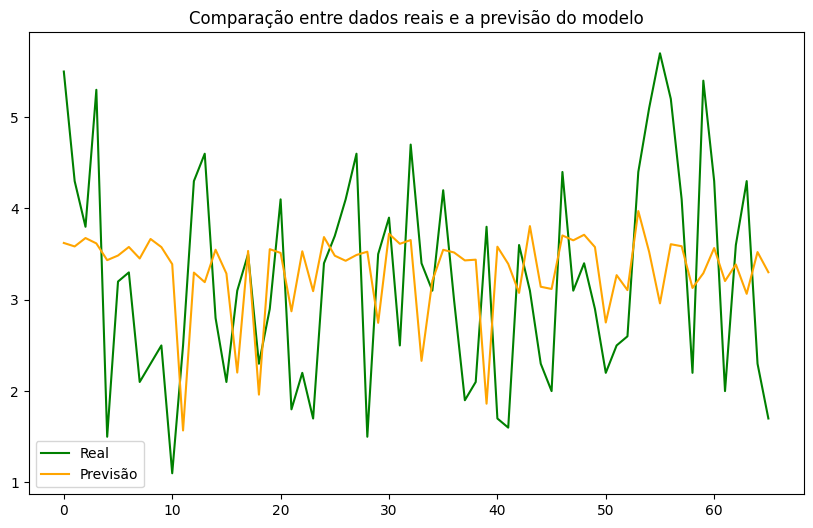

SVM para Regressão
MSE: 1.561038081797937
MAE: 1.0869198880863598
R2: -0.1918723209683455 



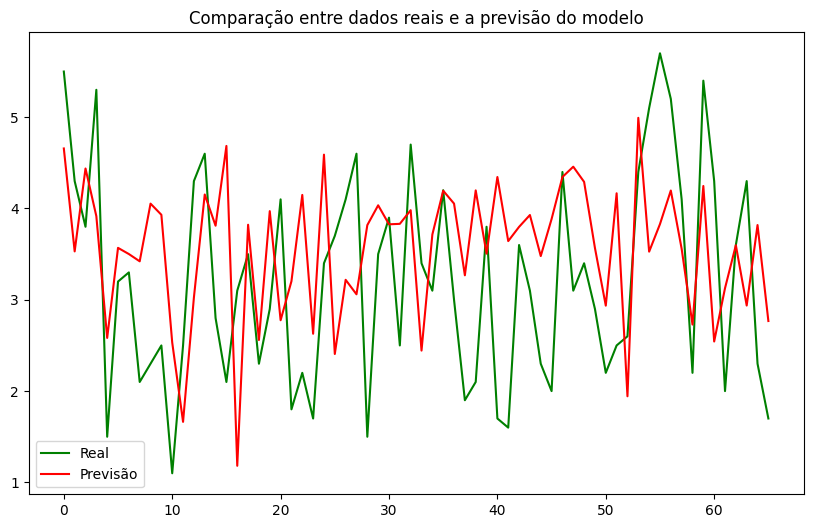

Regressão Linear
MSE: 1.2147697125166657
MAE: 0.9273676324804292
R2: 0.0725079589142914 



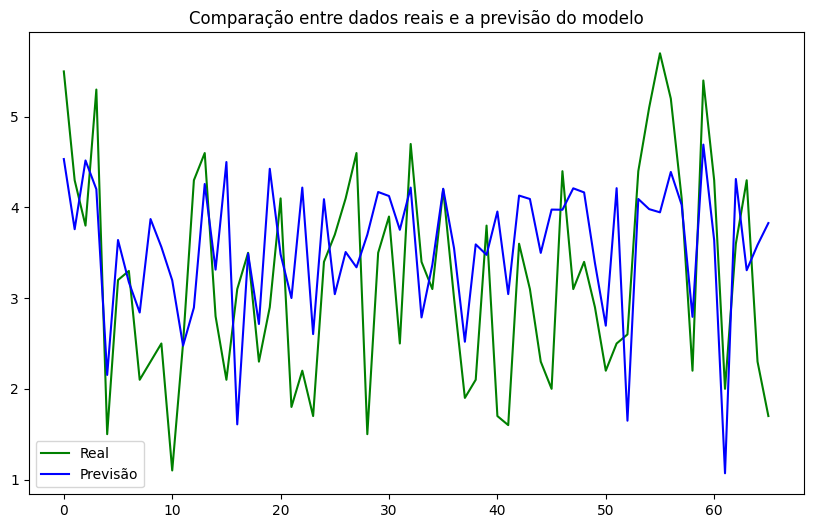

Árvore de Decisão
MSE: 2.405151515151515
MAE: 1.3242424242424242
R2: -0.8363636044948388 



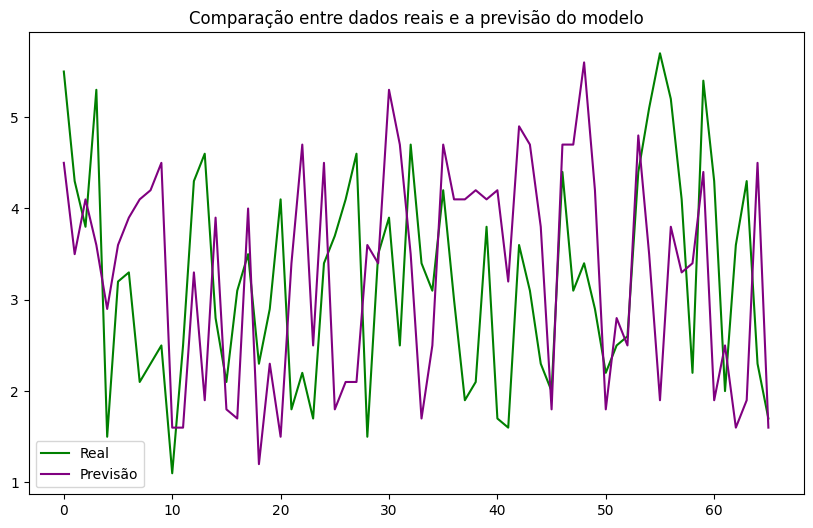

Horizonte  6
3/3 [==============================] - 0s 7ms/step
LSTM
MSE: 1.3614985170702418
MAE: 0.9664340864528308
R2: 0.04078262734310234 



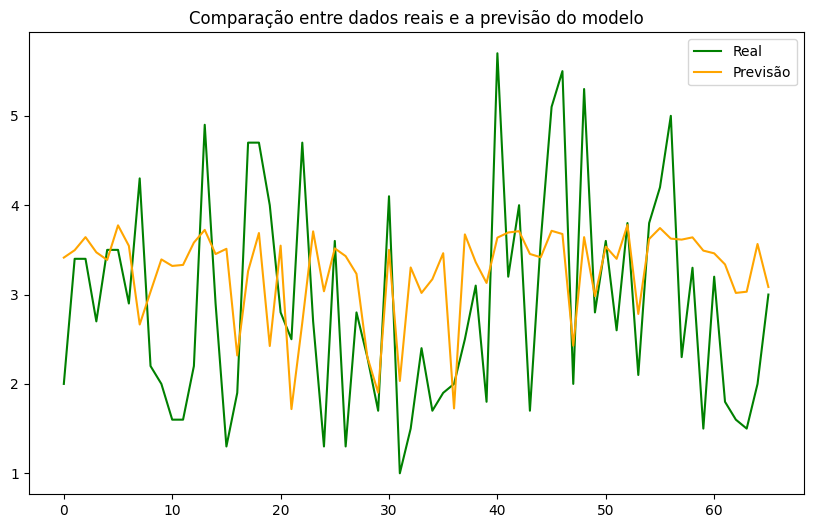

SVM para Regressão
MSE: 1.0987766537310342
MAE: 0.8610245000520331
R2: 0.22587822042097405 



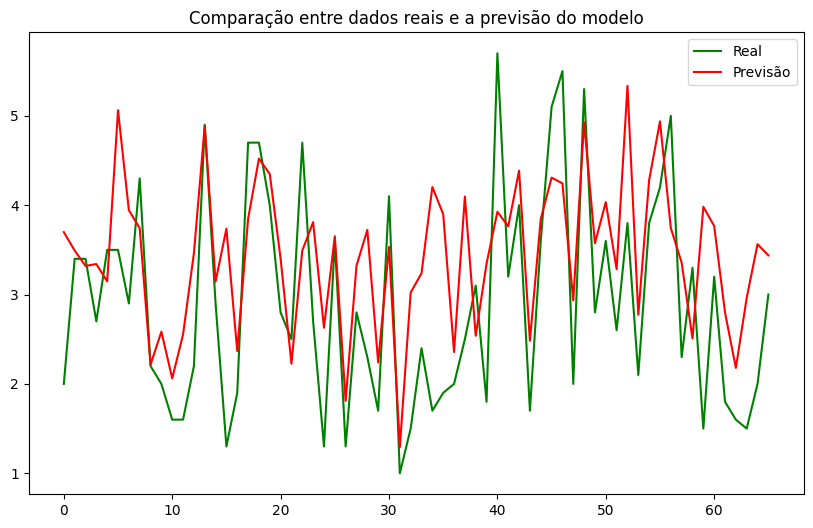

Regressão Linear
MSE: 1.0215979210095594
MAE: 0.8328232629650156
R2: 0.280252999605741 



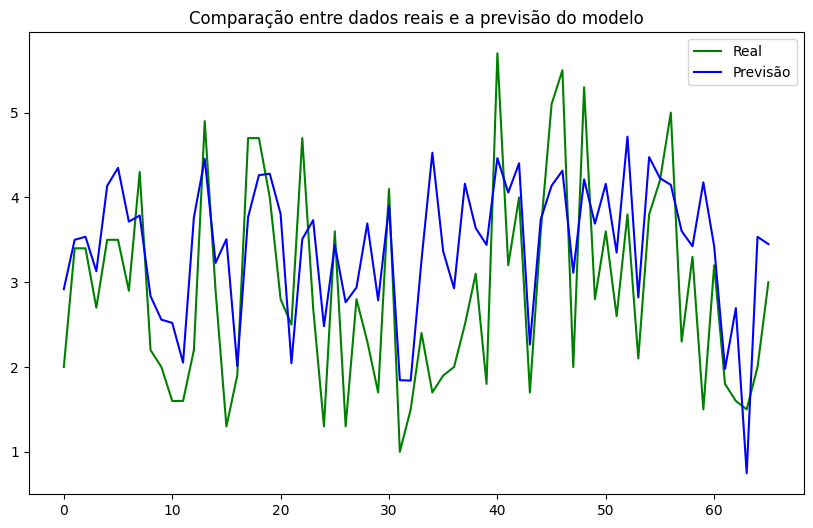

Árvore de Decisão
MSE: 2.0515151515151517
MAE: 1.1606060606060604
R2: -0.44535520893311165 



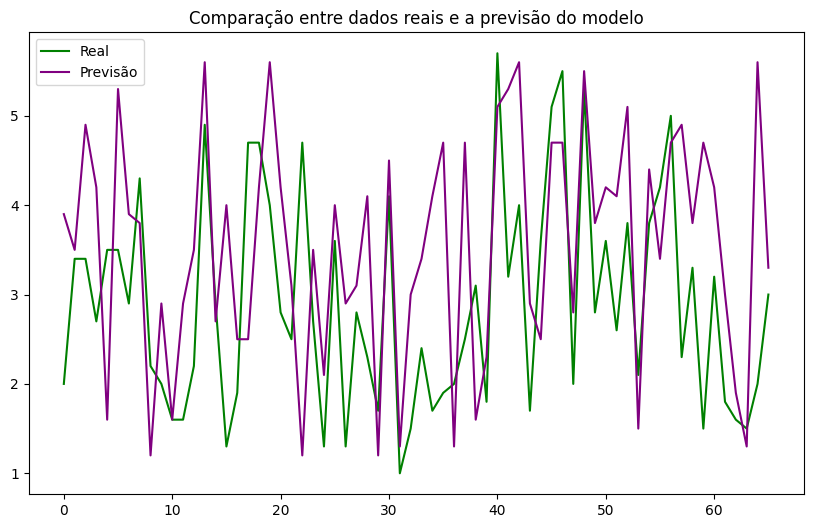

Horizonte  9
3/3 [==============================] - 0s 6ms/step
LSTM
MSE: 1.2763582016766932
MAE: 0.8941216125632776
R2: 0.050663733216823825 



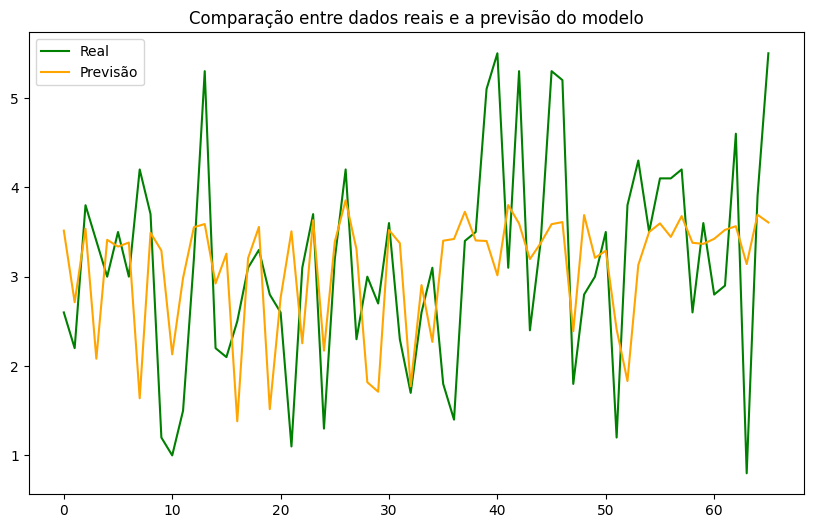

SVM para Regressão
MSE: 0.9569912581648428
MAE: 0.8070161350303645
R2: 0.2882041207735545 



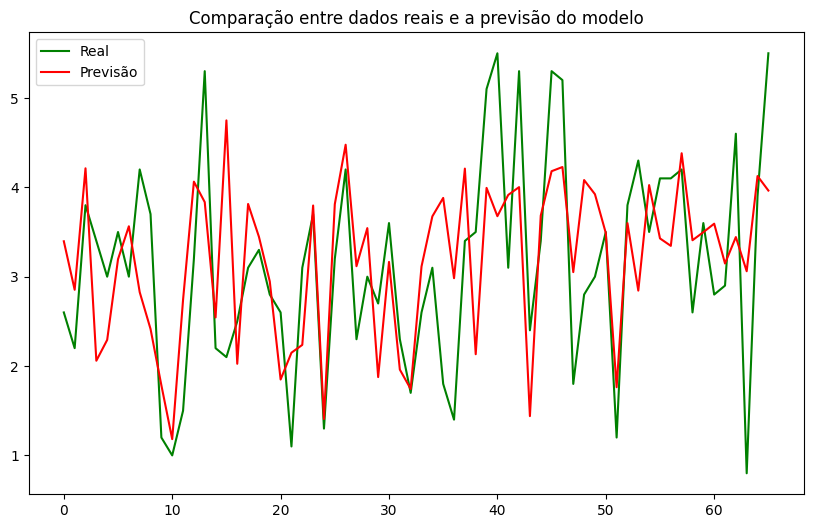

Regressão Linear
MSE: 0.6824634099008838
MAE: 0.6532581264442505
R2: 0.49239385548639736 



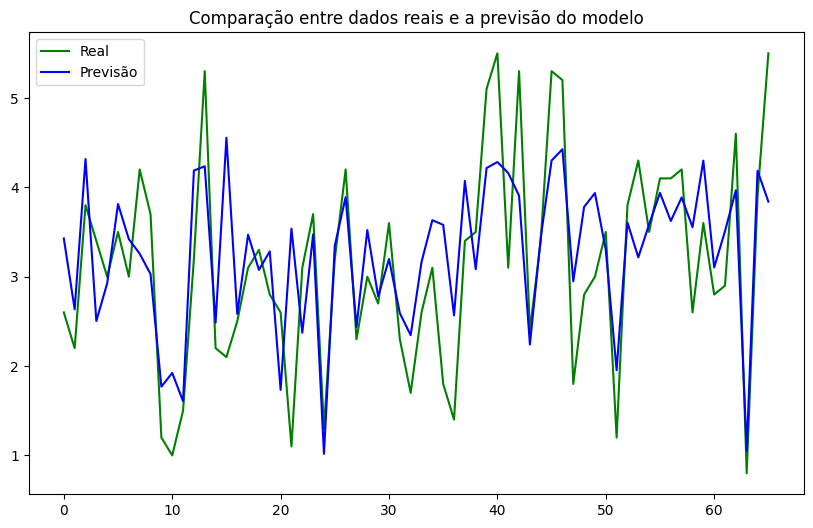

Árvore de Decisão
MSE: 1.9587878787878783
MAE: 1.1121212121212123
R2: -0.45691732134898944 



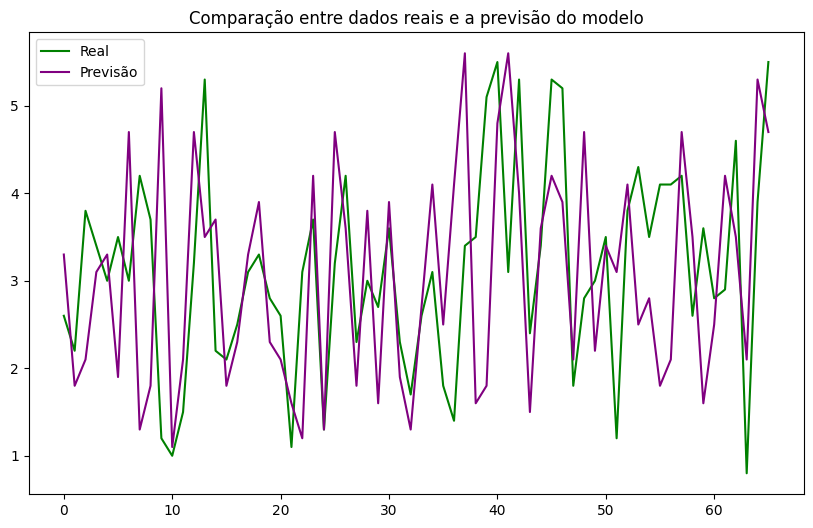

Horizonte  12
3/3 [==============================] - 0s 7ms/step
LSTM
MSE: 1.7713231669228156
MAE: 1.0875708558009223
R2: -0.09213922886801162 



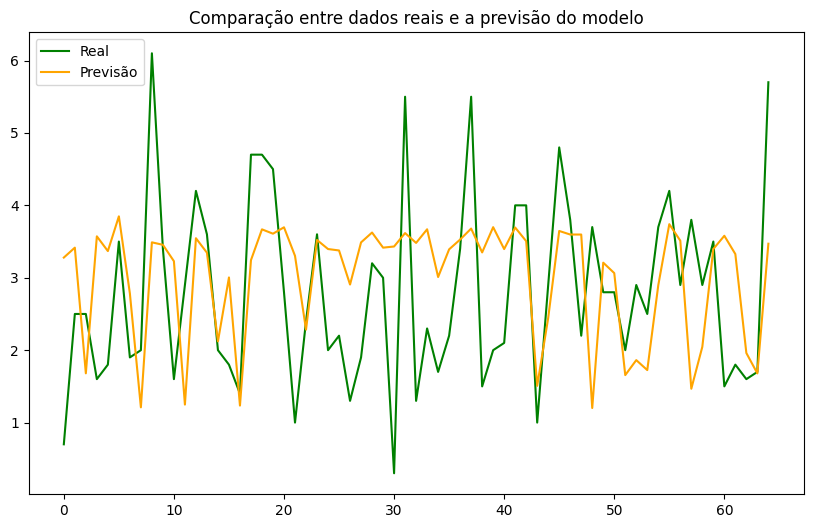

SVM para Regressão
MSE: 1.2831225167713232
MAE: 0.8895263063573867
R2: 0.20886913117933703 



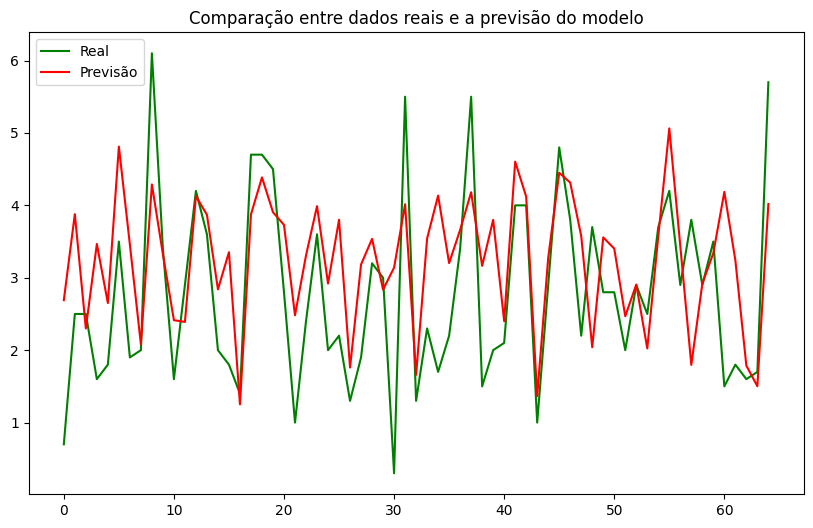

Regressão Linear
MSE: 1.3568186549180725
MAE: 0.9428687196774577
R2: 0.16343053195073654 



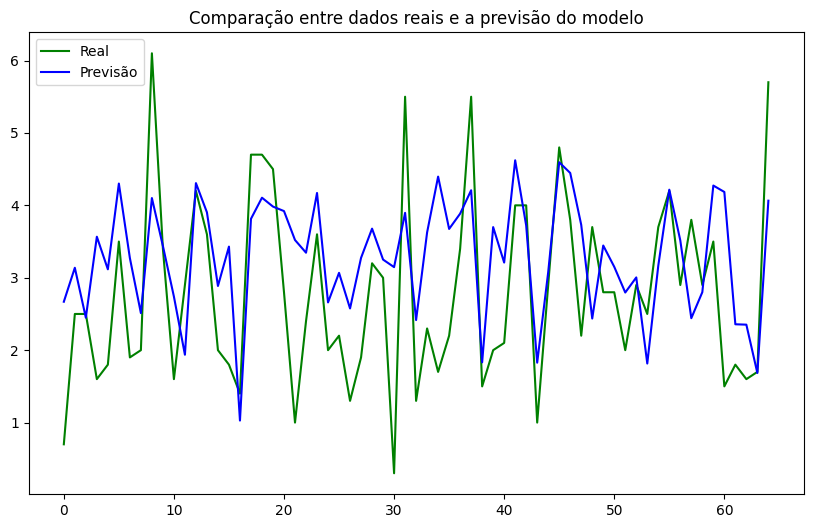

Árvore de Decisão
MSE: 1.278
MAE: 0.9215384615384615
R2: 0.21202750545059734 



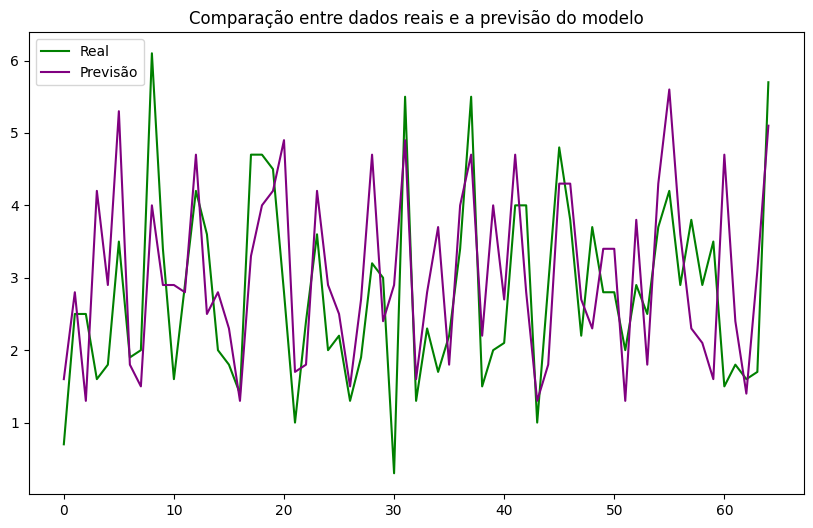

Horizonte  15
3/3 [==============================] - 0s 8ms/step
LSTM
MSE: 1.272654382511244
MAE: 0.9058115420919476
R2: -0.021575662517778982 



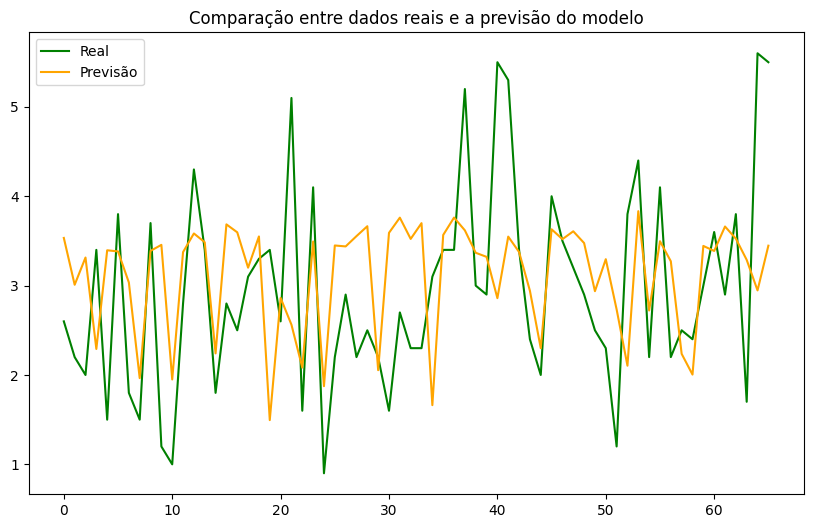

SVM para Regressão
MSE: 1.1073757089338523
MAE: 0.9113777385226902
R2: 0.11109560533006646 



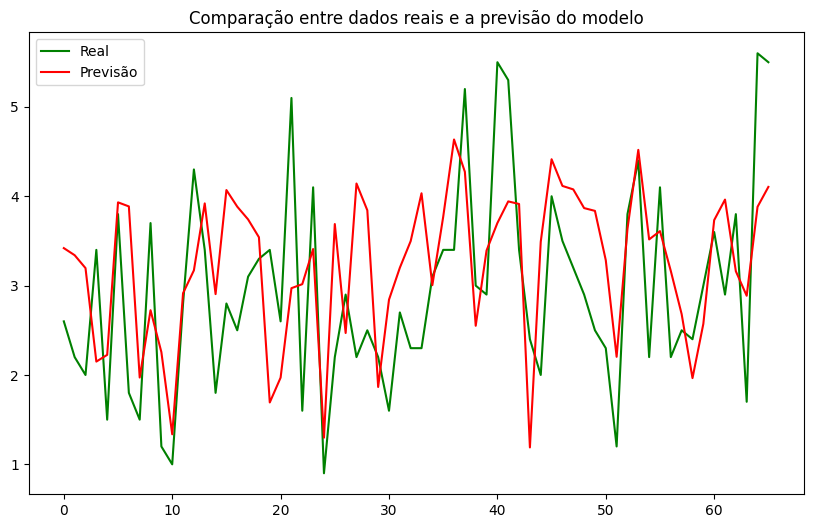

Regressão Linear
MSE: 1.0156016880830623
MAE: 0.8368474381402691
R2: 0.18476376491913538 



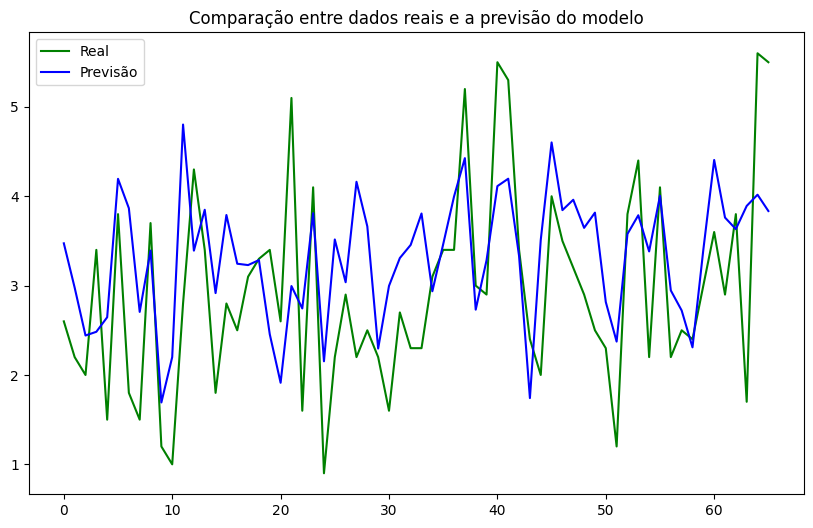

Árvore de Decisão
MSE: 1.994242424242424
MAE: 1.1151515151515152
R2: -0.600803449673829 



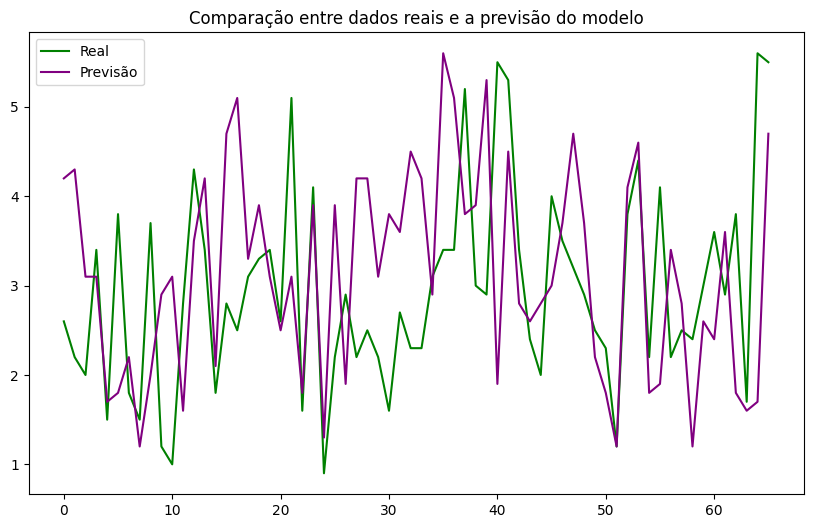

Horizonte  18
3/3 [==============================] - 0s 9ms/step
LSTM
MSE: 1.2052306669956494
MAE: 0.9074086431356577
R2: -0.04668888707340235 



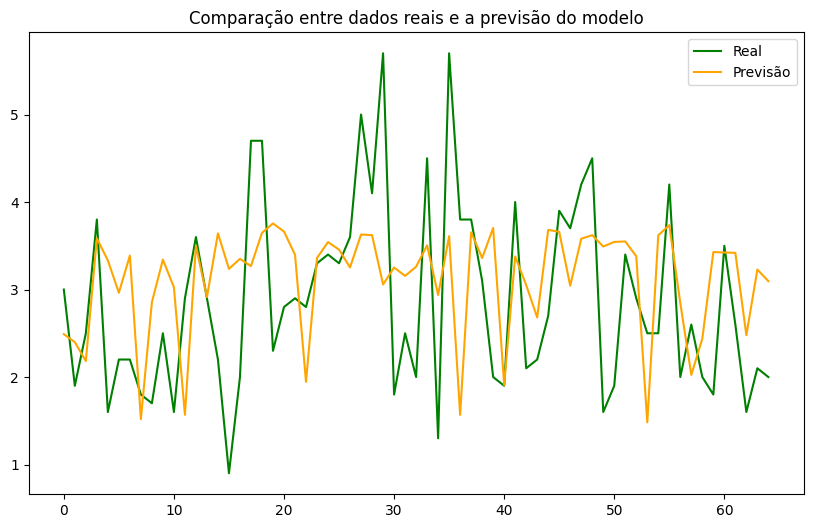

SVM para Regressão
MSE: 0.969562139071016
MAE: 0.7967140197098637
R2: 0.15797868069315213 



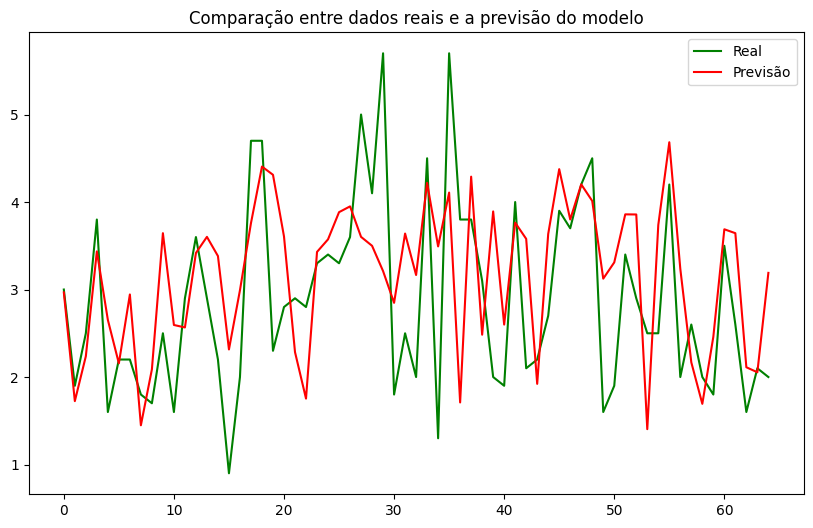

Regressão Linear
MSE: 0.929353952757703
MAE: 0.7988788211764781
R2: 0.19289769075155894 



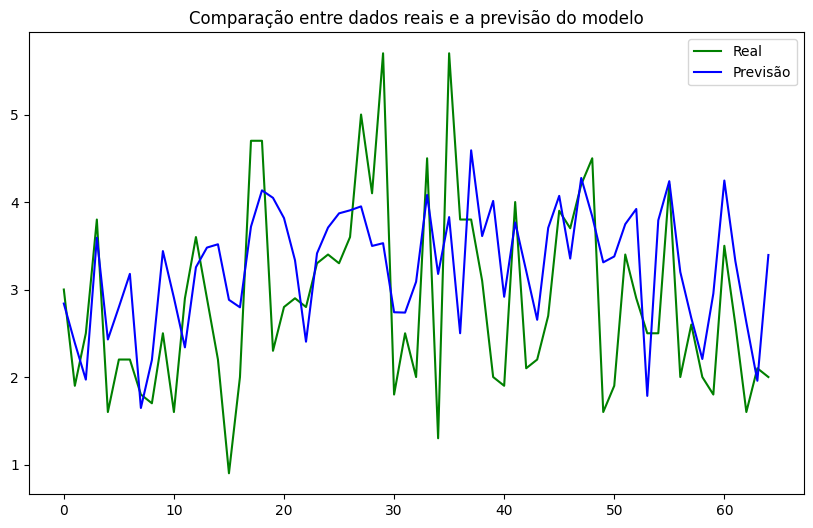

Árvore de Decisão
MSE: 1.392769230769231
MAE: 0.9276923076923076
R2: -0.20955773531539856 



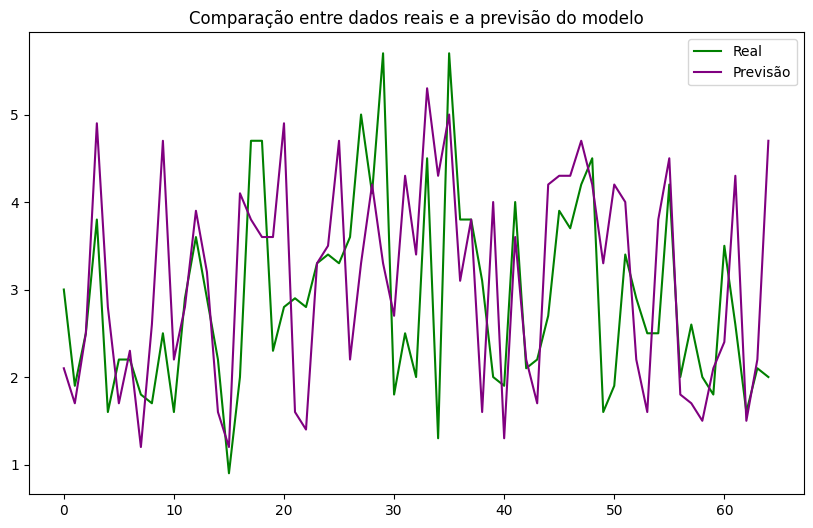

Horizonte  21
3/3 [==============================] - 0s 8ms/step
LSTM
MSE: 1.1689622257093981
MAE: 0.8479218145517201
R2: -0.04253537911879346 



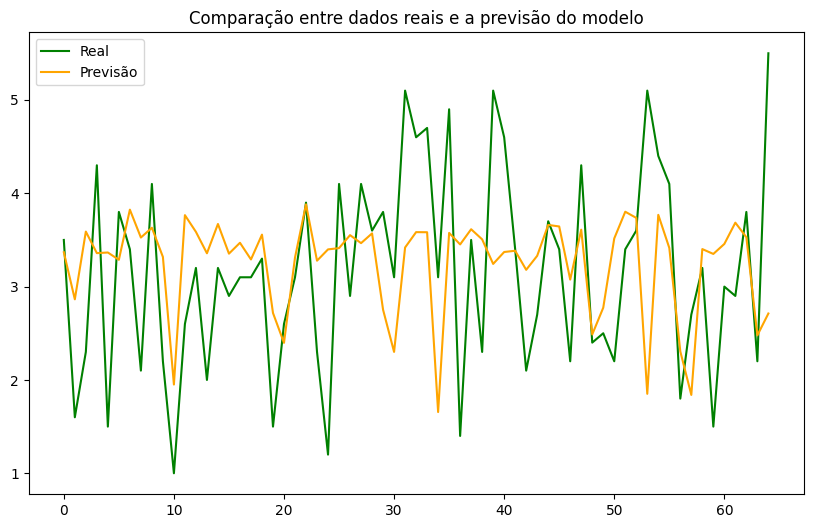

SVM para Regressão
MSE: 1.3217311291962606
MAE: 0.9627374921416584
R2: -0.17878185758612442 



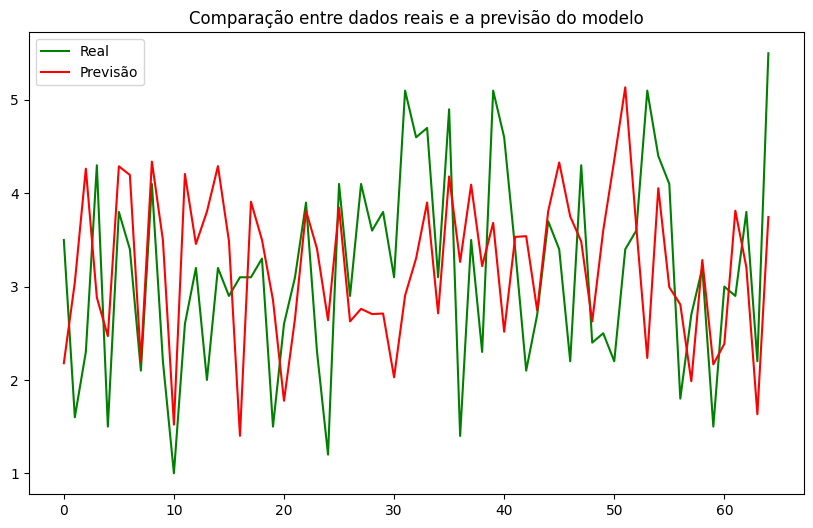

Regressão Linear
MSE: 0.7990110609460863
MAE: 0.7141533418334033
R2: 0.2874044335880712 



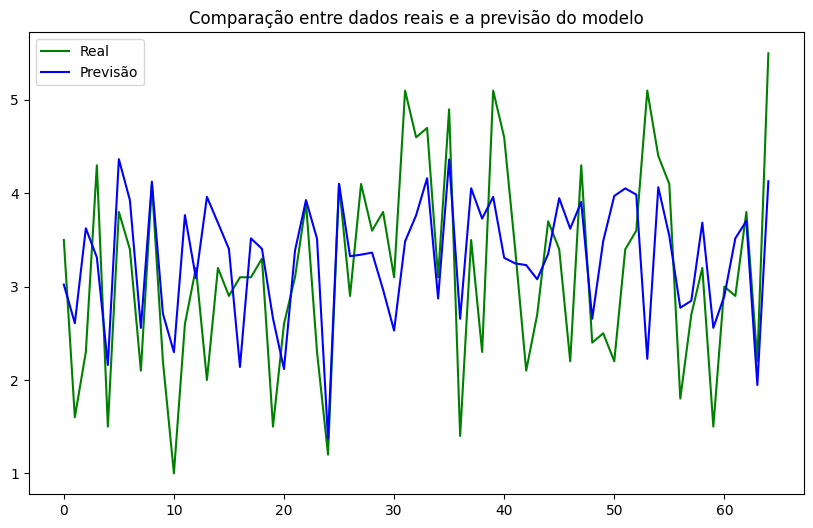

Árvore de Decisão
MSE: 2.2418461538461534
MAE: 1.2338461538461536
R2: -0.9993836229461133 



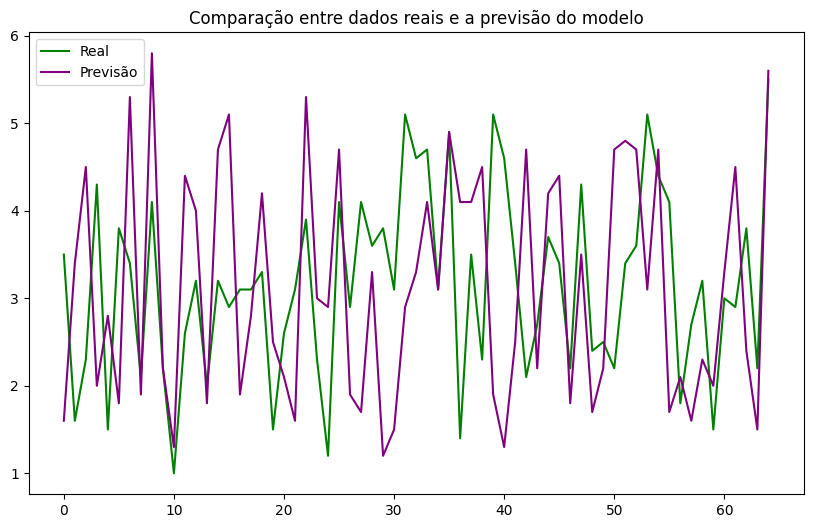

Horizonte  24
3/3 [==============================] - 0s 7ms/step
LSTM
MSE: 1.5825360735861598
MAE: 1.0672072168496938
R2: -0.05267535800226786 



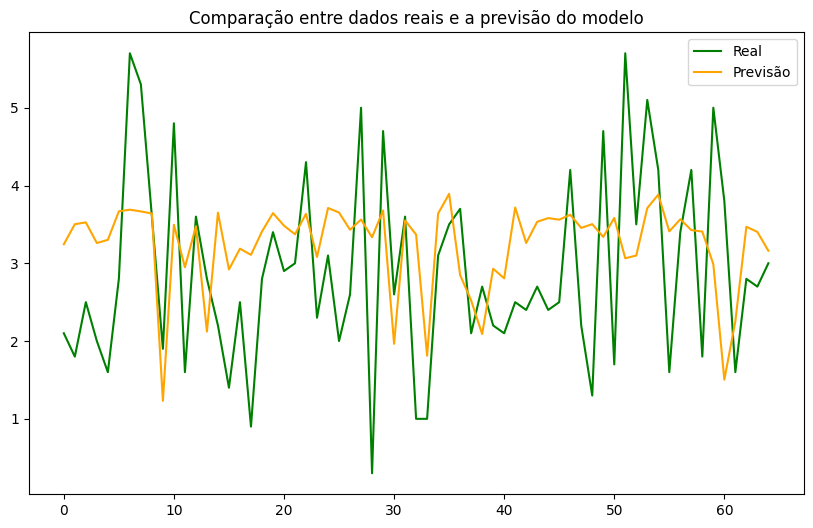

SVM para Regressão
MSE: 1.1088939615769648
MAE: 0.869904369037588
R2: 0.26238310299974865 



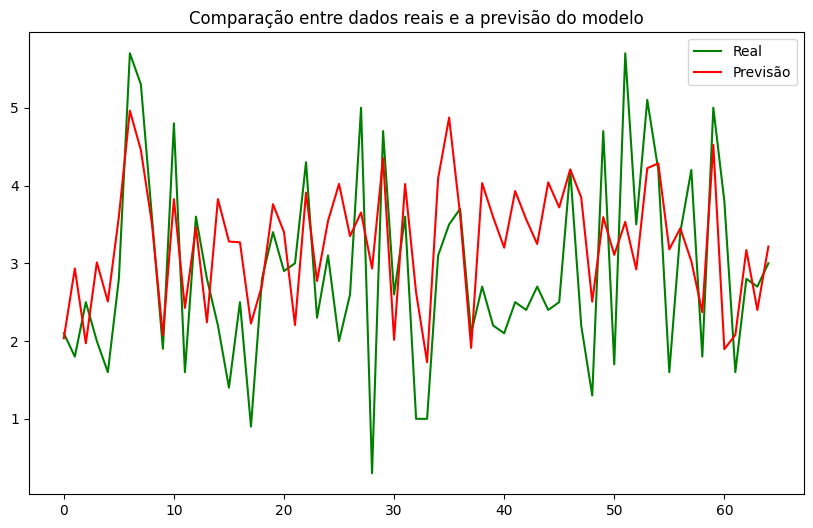

Regressão Linear
MSE: 1.2235216280480765
MAE: 0.8926166222338088
R2: 0.18613478117413407 



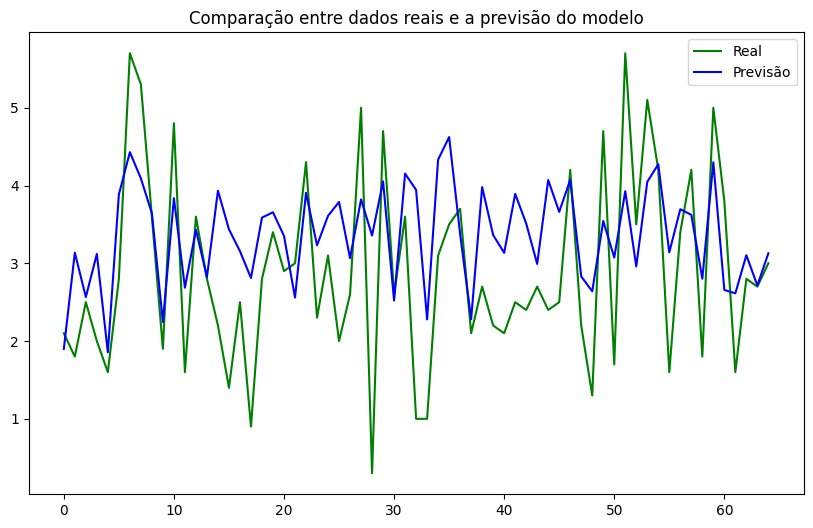

Árvore de Decisão
MSE: 1.7441538461538462
MAE: 1.050769230769231
R2: -0.1601806777462198 



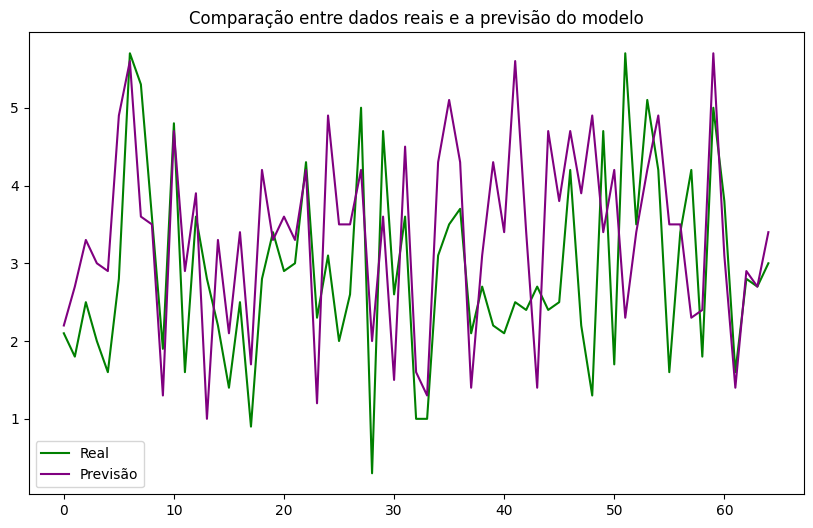

In [12]:
# Teste
i=0
for dados in h_data:

  i=i+3
  print("Horizonte ",i)

  #divisao de dados atributos e classe
  X = dados.values[:, 0:-1] #caracteristicas
  Y = dados.values[:, -1] #classe

  #usando o metodo para criar os conjuntos de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)

  #normalização
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # aplicacao dos modelos
#***************LSTM***************
  # Make predictions
  predictions = model.predict(X_test_scaled)

  # Avaliação do modelo
  mse_lstm = mean_squared_error(y_test, predictions)
  mae_lstm = mean_absolute_error(y_test, predictions)
  r2_lstm = r2_score(y_test, predictions)

  print("LSTM")
  print("MSE:", mse_lstm)
  print("MAE:", mae_lstm)
  print("R2:", r2_lstm,"\n")
  plot_lstm(predictions, y_test)


#*******Support Vector Regression (SVR)*******
  # Previsões do modelo
  previsoes_svr = modelo_svr.predict(X_test_scaled)

  # Avaliação do modelo
  mse_svr = mean_squared_error(y_test, previsoes_svr)
  mae_svr = mean_absolute_error(y_test, previsoes_svr)
  r2_svr = r2_score(y_test, previsoes_svr)

  print("SVM para Regressão")
  print("MSE:", mse_svr)
  print("MAE:", mae_svr)
  print("R2:", r2_svr, "\n")
  plot_svr(previsoes_svr, y_test)


#**********Regressão Linear**********
  # Previsões do modelo
  previsoes_linear = modelo_linear.predict(X_test_scaled)

  # Avaliação do modelo

  mse_linear = mean_squared_error(y_test, previsoes_linear)
  mae_linear = mean_absolute_error(y_test, previsoes_linear)
  r2_linear = r2_score(y_test, previsoes_linear)

  print("Regressão Linear")
  print("MSE:", mse_linear)
  print("MAE:", mae_linear)
  print("R2:", r2_linear,"\n")
  plot_rl(previsoes_linear, y_test)



#**********Árvore de Decisão**********
  # Previsões do modelo
  previsoes_arvore = modelo_arvore.predict(X_test_scaled)

  # Avaliação do modelo

  mse_arvore = mean_squared_error(y_test, previsoes_arvore)
  mae_arvore = mean_absolute_error(y_test, previsoes_arvore)
  r2_arvore = r2_score(y_test, previsoes_arvore)

  print("Árvore de Decisão")
  print("MSE:", mse_arvore)
  print("MAE:", mae_arvore)
  print("R2:", r2_arvore,"\n")
  plot_arvore(previsoes_arvore, y_test)

Como pode ser observado nas métricas de avaliação, o desempenho dos modelos quando aplicados aos dados de teste foi bem ruim, o melhor desempenho observado entre eles foi o do modelo de Regressão Linear no Horizonte 9, cujas métricas foram:

*   MSE: 0.6824634099008838
*   MAE: 0.6532581264442505
*   R2: 0.49239385548639736

### Considerações finais

Como foi observado, os modelos selecionados por mim não tiveram um bom desempenho na previsão quando analisamos as métricas, embora as plotagens mostrem que as previsões se aproximaram razoavelmente do real, exceto a plotagem do modelo específico para séries temporais.

Não sei se pela minha inexperiência com modelos deste tipo ou por uma escolha ruim, mas o LSTM apresentou um desempenho bem ruim se observarmos as plotagens, o que se confirma quando analisadas as métricas de avaliação para esse modelo.